In [1]:
from copy import deepcopy
import warnings
 
warnings.filterwarnings("ignore")
 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
 
sns.set_style("whitegrid")
 
%matplotlib inline

# Reading data
 
Uploaded dataset to githib to use similarity with **colab**, **kaggle** and **local**.

In [2]:
data_folder = "https://raw.githubusercontent.com/XelorR/kaggle_tabular_playground_may21/master/input/tabular-playground-series-may-2021"
 
train = pd.read_csv(f"{data_folder}/train.csv")
test = pd.read_csv(f"{data_folder}/test.csv")
sample_submission = pd.read_csv(f"{data_folder}/sample_submission.csv")
 
train.shape, test.shape, sample_submission.shape

((100000, 52), (50000, 51), (50000, 5))

# Functions

In [3]:
def describe_nums(df, sort_by="unique"):
    return (
        df.nunique()
        .to_frame()
        .rename(columns={0: "unique"})
        .join(df.describe().T, how="left")
        .sort_values([sort_by], ascending=False)
        .style.bar(["mean"])
        .background_gradient(subset=["50%"], cmap="viridis")
        .background_gradient(subset=["std"], cmap="Reds")
        .bar("unique", color="lightblue")
    )
 
 
def show_IQR(series, bins_n=None):
 
    perc_25 = series.quantile(0.25, interpolation="midpoint")
    perc_75 = series.quantile(0.75, interpolation="midpoint")
    IQR = perc_75 - perc_25
 
    print(
        f"Unique values count: {series.nunique()}",
        f"\nQ1: {perc_25}\nQ3: {perc_75}\nIQR: {IQR}",
        f"\nOutliers borders: [{perc_25 - 1.5*IQR}, {perc_75 + 1.5*IQR}]",
    )
 
    fig, axes = plt.subplots(ncols=2, figsize=(16, 6))
    sns.distplot(series.values, bins=bins_n, color="#50248f", ax=axes[0]).set(
        xlabel=series.name,
        ylabel="Quantity (frequency)",
        title=series.name + " distribution\n",
    )
 
    sns.boxplot(series.values, color="#38d1ff", ax=axes[1]).set(
        xlabel=series.name, title=series.name + " distribution\n"
    )
 
    plt.show()
 
 
def show_by_cat(df, cat, numeric):
    fig, ax = plt.subplots(figsize=(12, 6))
    sns.boxplot(
        x=cat,
        y=numeric,
        data=df,
        ax=ax,
    )
    ax.set_title("Boxplot for: " + cat + " vs " + numeric)
    plt.show()

# EDA

## Describe

In [4]:
train.columns

Index(['id', 'feature_0', 'feature_1', 'feature_2', 'feature_3', 'feature_4',
       'feature_5', 'feature_6', 'feature_7', 'feature_8', 'feature_9',
       'feature_10', 'feature_11', 'feature_12', 'feature_13', 'feature_14',
       'feature_15', 'feature_16', 'feature_17', 'feature_18', 'feature_19',
       'feature_20', 'feature_21', 'feature_22', 'feature_23', 'feature_24',
       'feature_25', 'feature_26', 'feature_27', 'feature_28', 'feature_29',
       'feature_30', 'feature_31', 'feature_32', 'feature_33', 'feature_34',
       'feature_35', 'feature_36', 'feature_37', 'feature_38', 'feature_39',
       'feature_40', 'feature_41', 'feature_42', 'feature_43', 'feature_44',
       'feature_45', 'feature_46', 'feature_47', 'feature_48', 'feature_49',
       'target'],
      dtype='object')

In [5]:
describe_nums(train.loc[:, train.columns.str.startswith("feature")])

,unique,count,mean,std,min,25%,50%,75%,max
feature_38,71,100000.000000,2.997170,5.386551,-8.000000,0.000000,1.000000,4.000000,66.000000
feature_39,70,100000.000000,0.674640,3.732428,-5.000000,0.000000,0.000000,0.000000,66.000000
feature_19,58,100000.000000,1.564780,4.749449,-2.000000,0.000000,0.000000,1.000000,55.000000
feature_14,52,100000.000000,2.597320,4.655092,0.000000,0.000000,1.000000,3.000000,51.000000
feature_31,46,100000.000000,1.372040,3.319325,-1.000000,0.000000,0.000000,1.000000,46.000000
feature_48,45,100000.000000,0.970850,2.576615,0.000000,0.000000,0.000000,1.000000,44.000000
feature_35,44,100000.000000,0.908980,2.952305,-2.000000,0.000000,0.000000,0.000000,43.000000
feature_30,43,100000.000000,0.294500,1.352963,-1.000000,0.000000,0.000000,0.000000,41.000000
feature_42,40,100000.000000,0.529230,2.300826,-2.000000,0.000000,0.000000,0.000000,37.000000
feature_4,38,100000.000000,0.599770,2.785531,0.000000,0.000000,0.000000,0.000000,38.000000


## Distribution plots

- all features looks like nominative or ordinal variables
- all features have more low values
- all features have a lot of zeros

Unique values count: 10 
Q1: 1.0
Q3: 3.0
IQR: 2.0 
Outliers borders: [-2.0, 6.0]


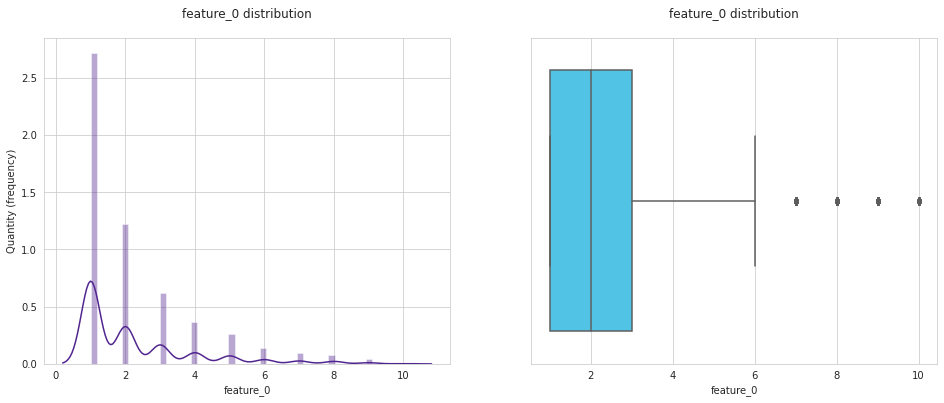

Unique values count: 30 
Q1: 1.0
Q3: 5.0
IQR: 4.0 
Outliers borders: [-5.0, 11.0]


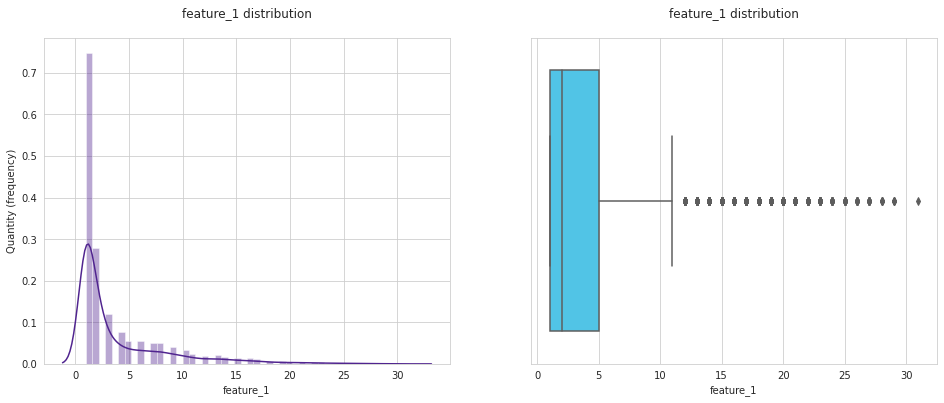

Unique values count: 6 
Q1: 1.0
Q3: 2.0
IQR: 1.0 
Outliers borders: [-0.5, 3.5]


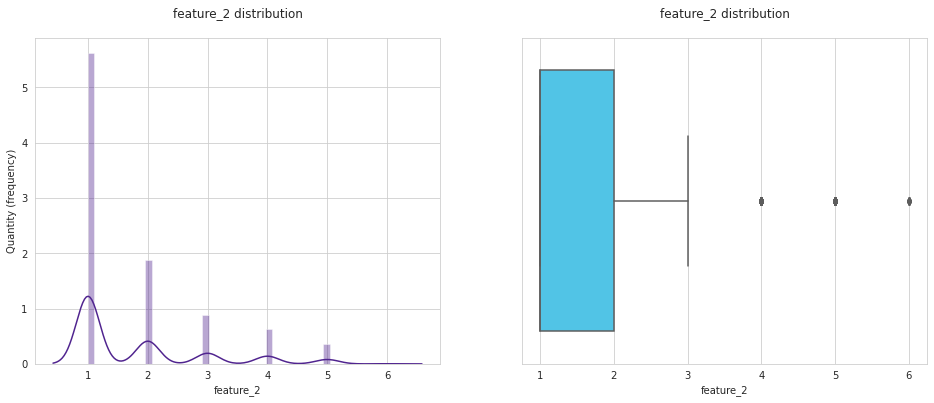

Unique values count: 25 
Q1: 1.0
Q3: 3.0
IQR: 2.0 
Outliers borders: [-2.0, 6.0]


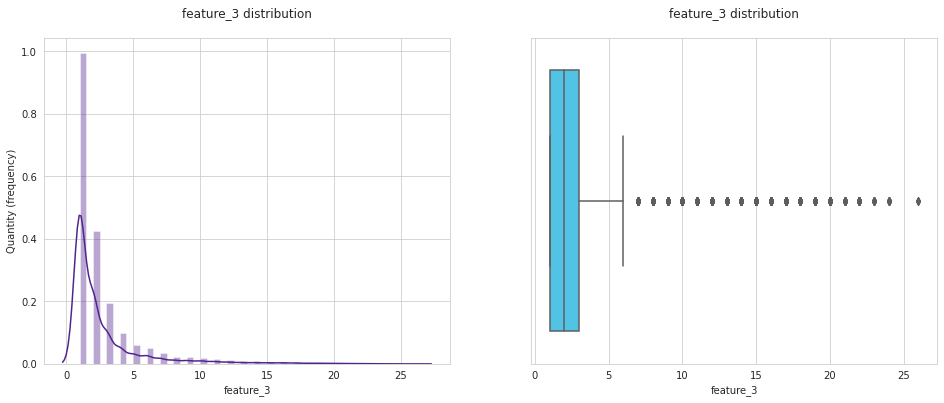

Unique values count: 37 
Q1: 1.0
Q3: 7.0
IQR: 6.0 
Outliers borders: [-8.0, 16.0]


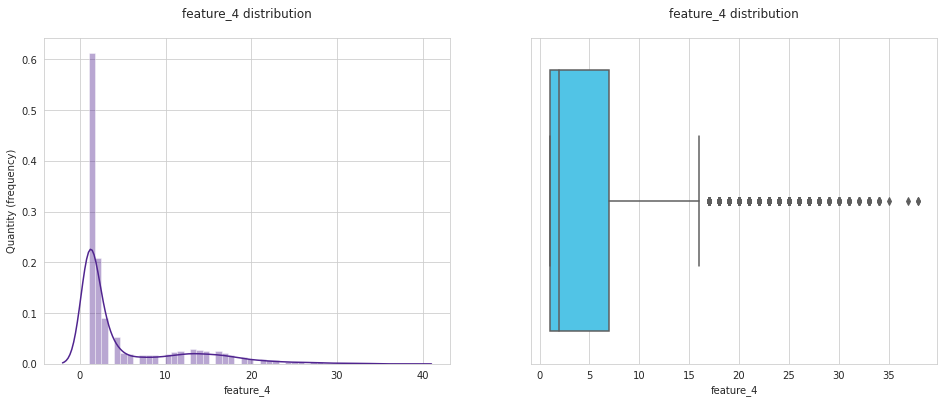

Unique values count: 10 
Q1: 1.0
Q3: 2.0
IQR: 1.0 
Outliers borders: [-0.5, 3.5]


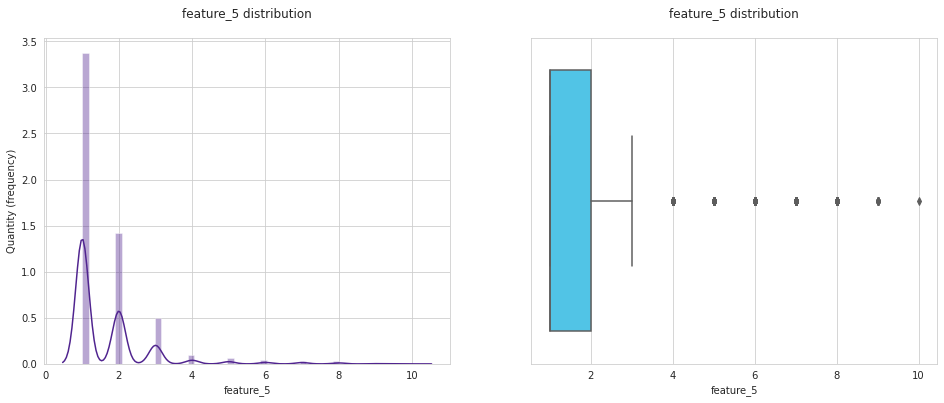

Unique values count: 27 
Q1: 1.0
Q3: 6.0
IQR: 5.0 
Outliers borders: [-6.5, 13.5]


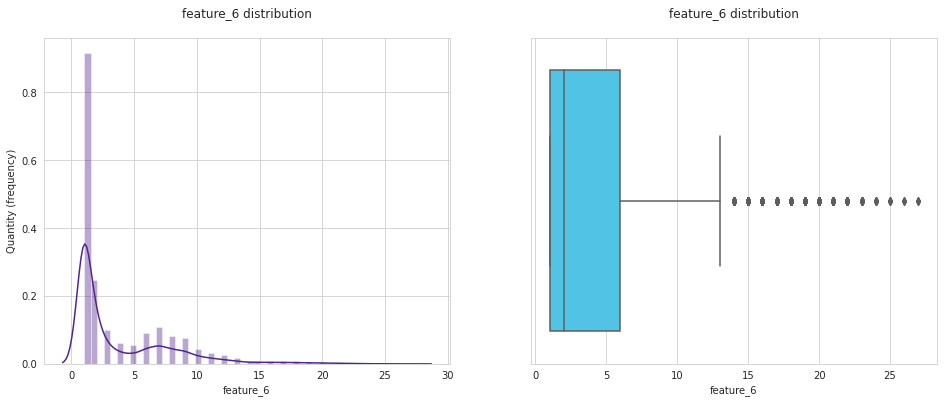

Unique values count: 31 
Q1: 1.0
Q3: 5.0
IQR: 4.0 
Outliers borders: [-5.0, 11.0]


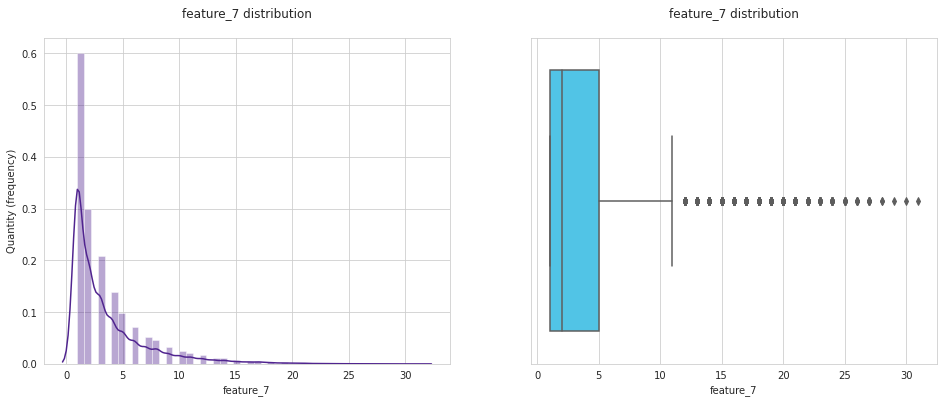

Unique values count: 36 
Q1: 1.0
Q3: 4.0
IQR: 3.0 
Outliers borders: [-3.5, 8.5]


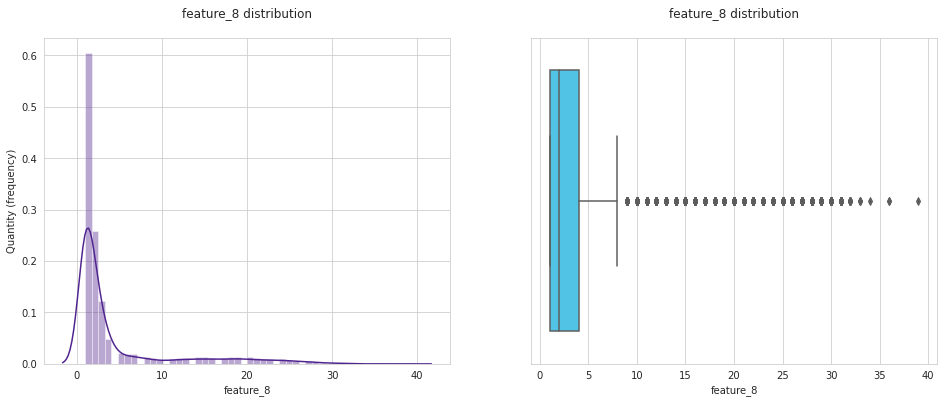

Unique values count: 17 
Q1: 1.0
Q3: 4.0
IQR: 3.0 
Outliers borders: [-3.5, 8.5]


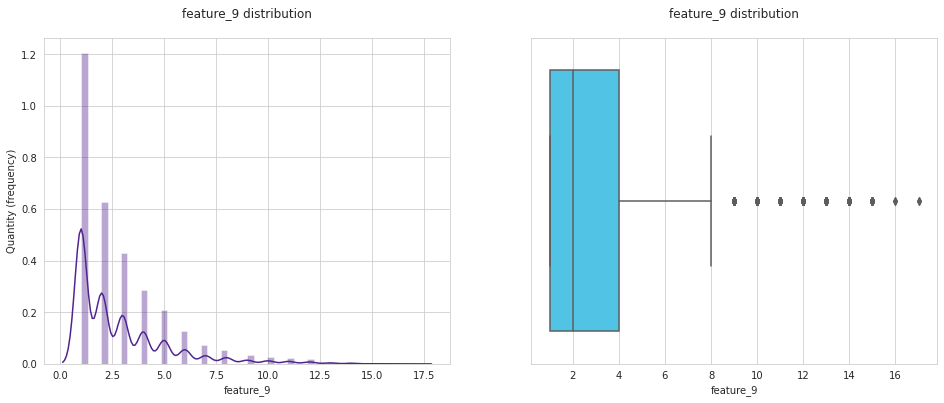

Unique values count: 16 
Q1: 1.0
Q3: 3.0
IQR: 2.0 
Outliers borders: [-2.0, 6.0]


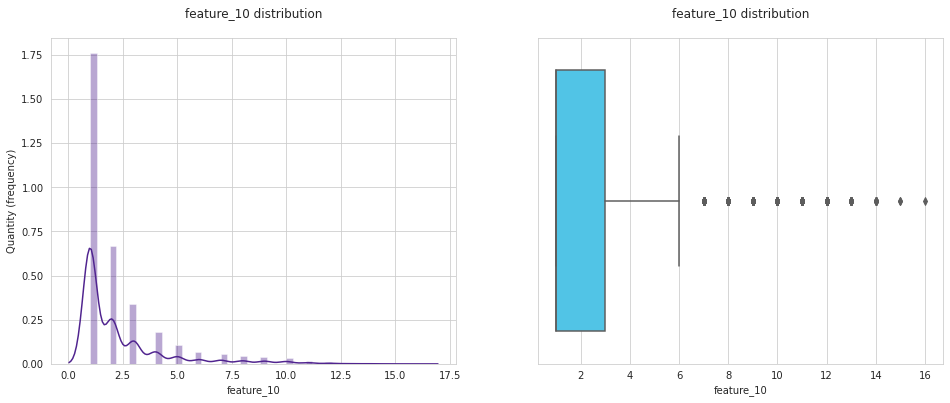

Unique values count: 12 
Q1: 1.0
Q3: 2.0
IQR: 1.0 
Outliers borders: [-0.5, 3.5]


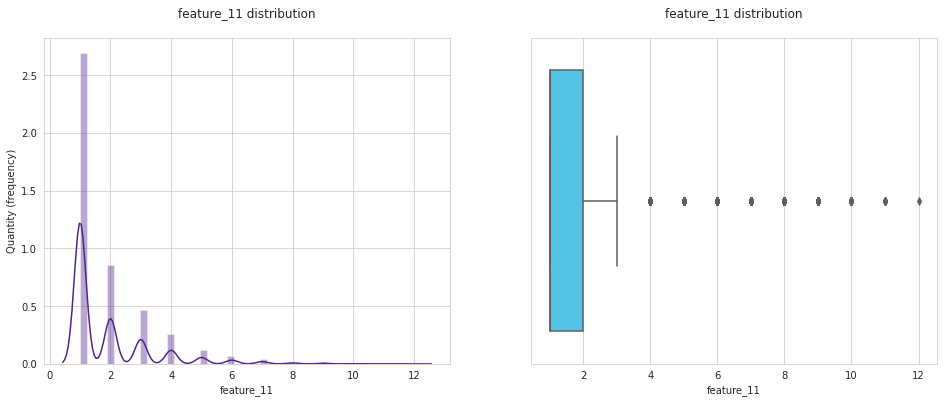

Unique values count: 11 
Q1: 1.0
Q3: 3.0
IQR: 2.0 
Outliers borders: [-2.0, 6.0]


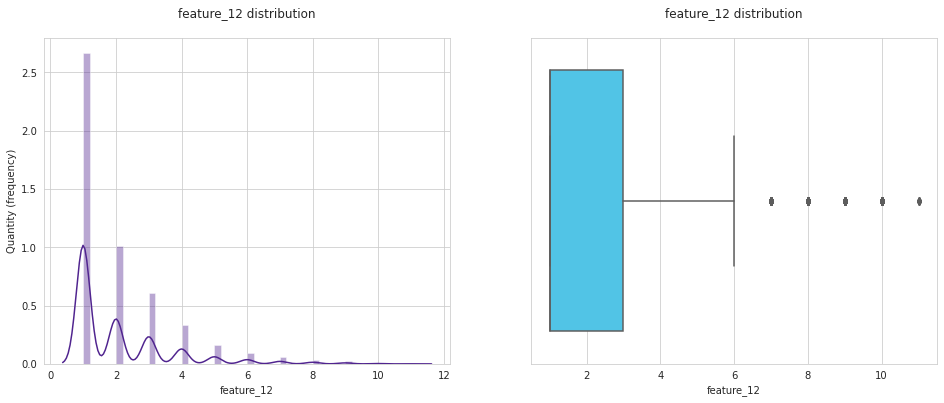

Unique values count: 3 
Q1: 1.0
Q3: 2.0
IQR: 1.0 
Outliers borders: [-0.5, 3.5]


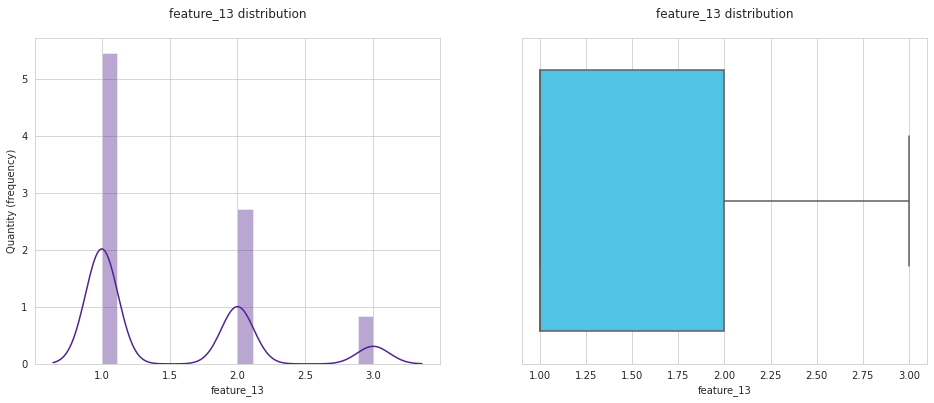

Unique values count: 51 
Q1: 1.0
Q3: 5.0
IQR: 4.0 
Outliers borders: [-5.0, 11.0]


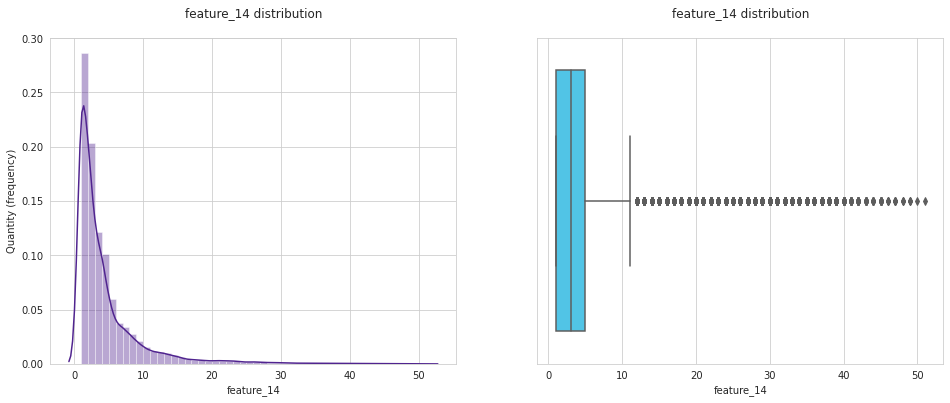

Unique values count: 20 
Q1: 1.0
Q3: 3.0
IQR: 2.0 
Outliers borders: [-2.0, 6.0]


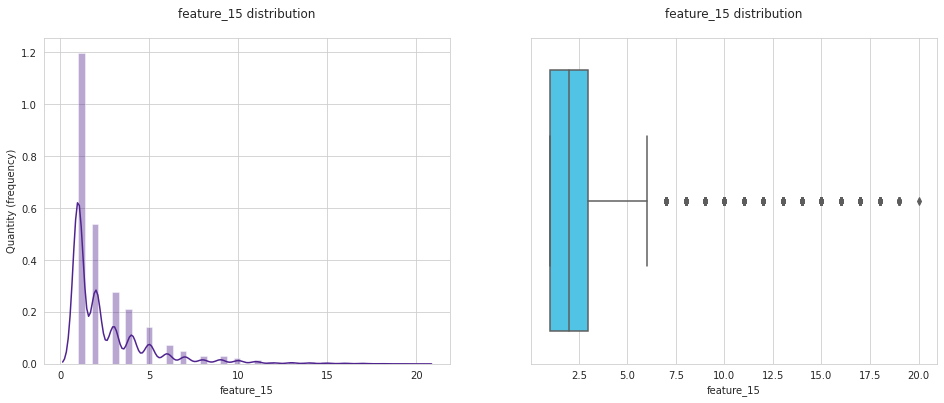

Unique values count: 19 
Q1: 1.0
Q3: 3.0
IQR: 2.0 
Outliers borders: [-2.0, 6.0]


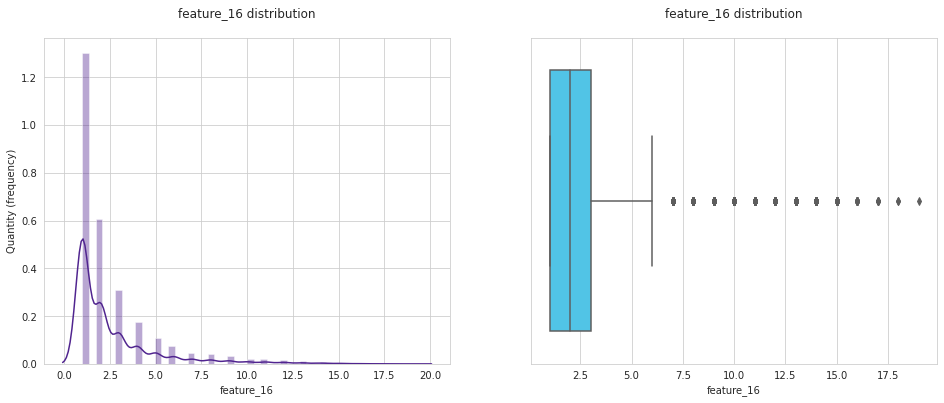

Unique values count: 16 
Q1: 1.0
Q3: 4.0
IQR: 3.0 
Outliers borders: [-3.5, 8.5]


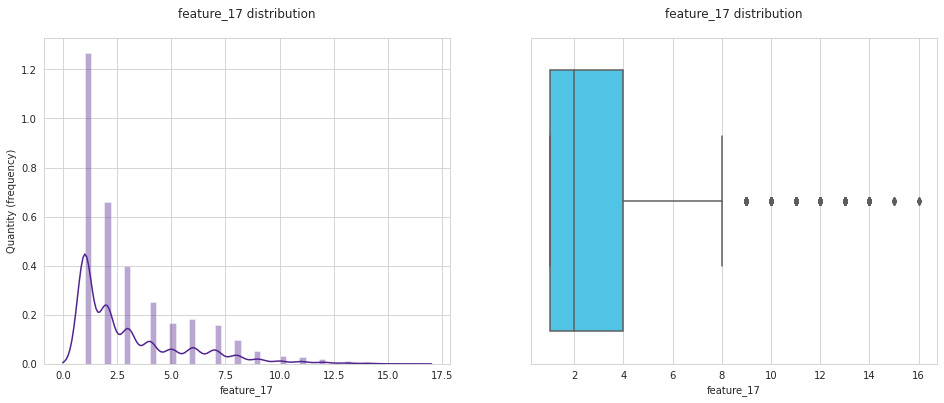

Unique values count: 13 
Q1: 1.0
Q3: 2.0
IQR: 1.0 
Outliers borders: [-0.5, 3.5]


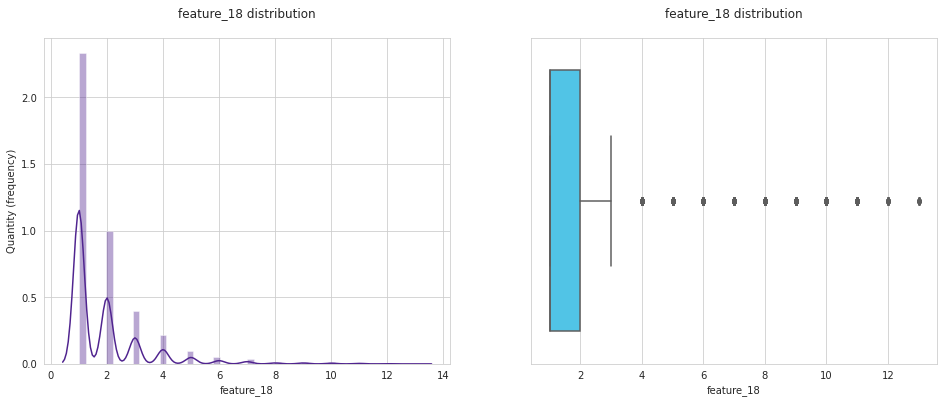

Unique values count: 57 
Q1: 1.0
Q3: 9.0
IQR: 8.0 
Outliers borders: [-11.0, 21.0]


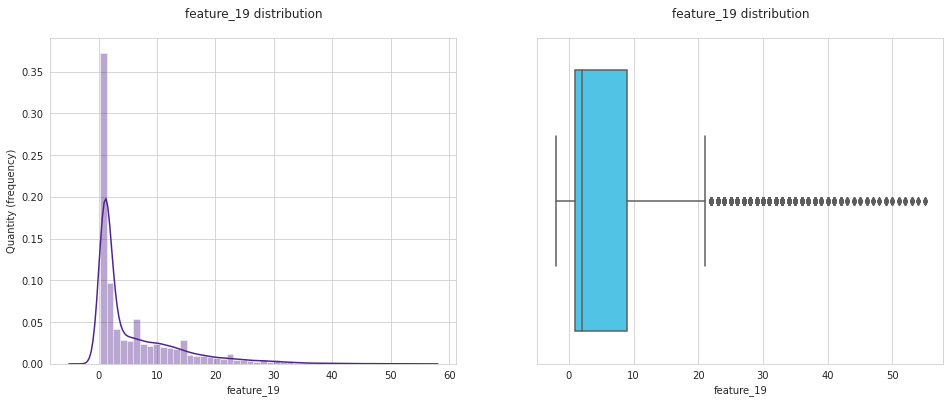

Unique values count: 17 
Q1: 1.0
Q3: 2.0
IQR: 1.0 
Outliers borders: [-0.5, 3.5]


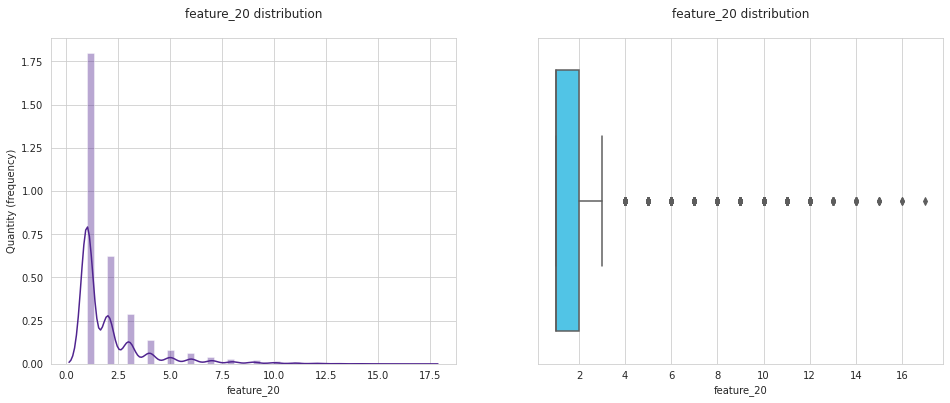

Unique values count: 35 
Q1: 1.0
Q3: 3.0
IQR: 2.0 
Outliers borders: [-2.0, 6.0]


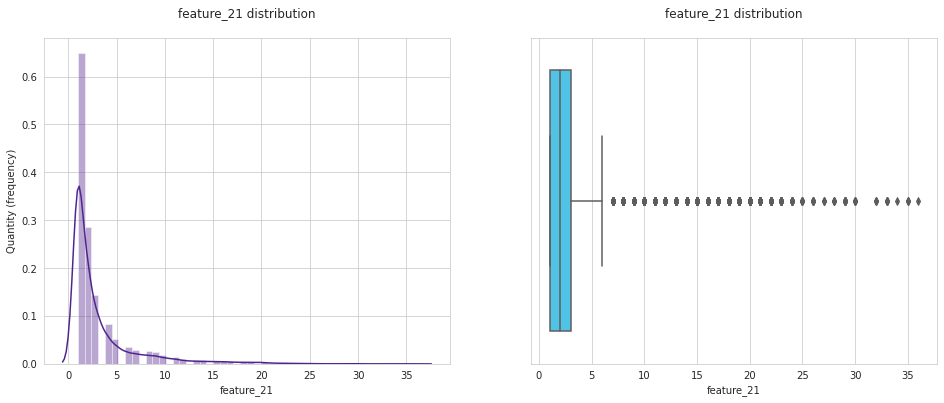

Unique values count: 4 
Q1: 1.0
Q3: 2.0
IQR: 1.0 
Outliers borders: [-0.5, 3.5]


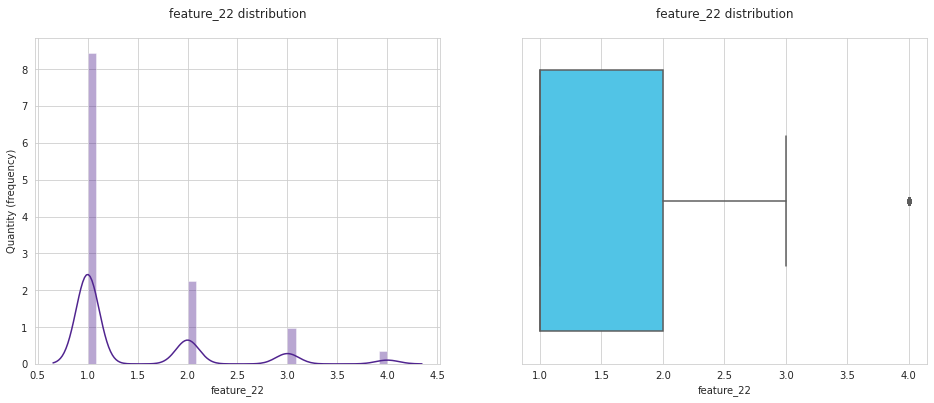

Unique values count: 19 
Q1: 1.0
Q3: 3.0
IQR: 2.0 
Outliers borders: [-2.0, 6.0]


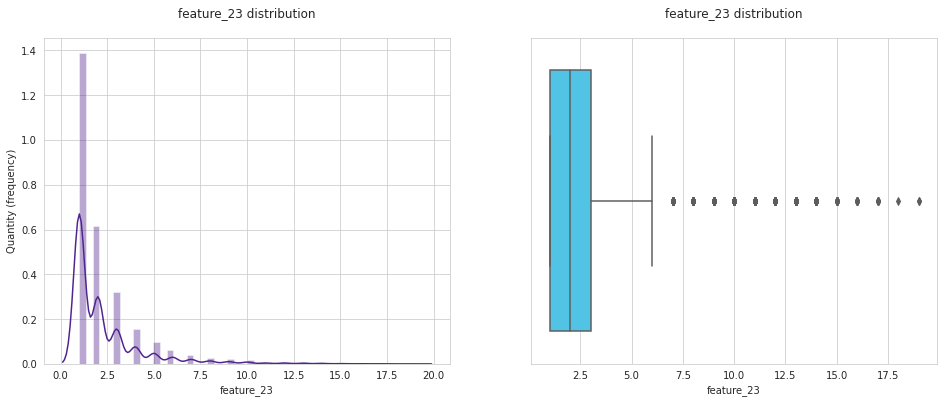

Unique values count: 34 
Q1: 1.0
Q3: 4.0
IQR: 3.0 
Outliers borders: [-3.5, 8.5]


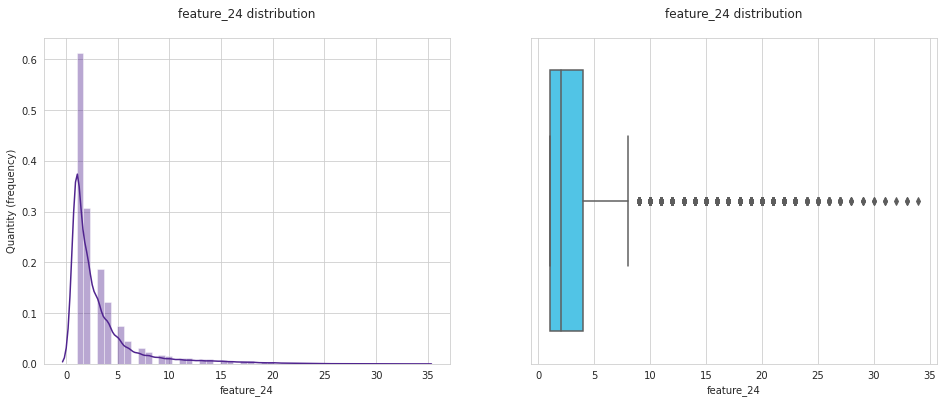

Unique values count: 22 
Q1: 1.0
Q3: 2.0
IQR: 1.0 
Outliers borders: [-0.5, 3.5]


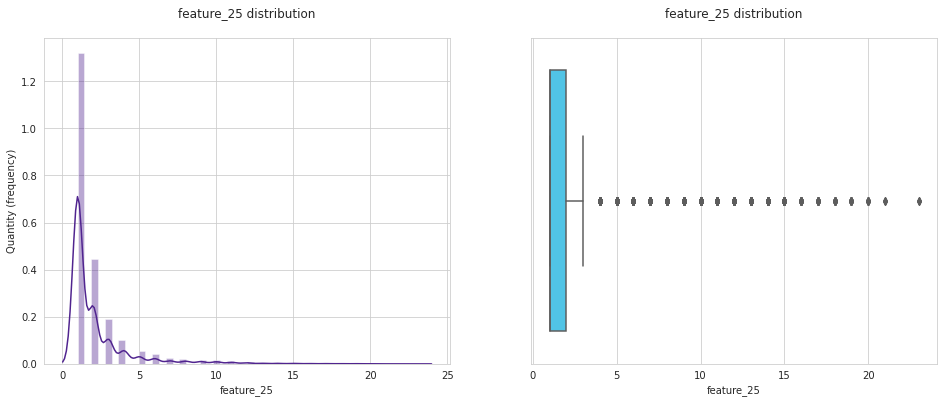

Unique values count: 21 
Q1: 1.0
Q3: 3.0
IQR: 2.0 
Outliers borders: [-2.0, 6.0]


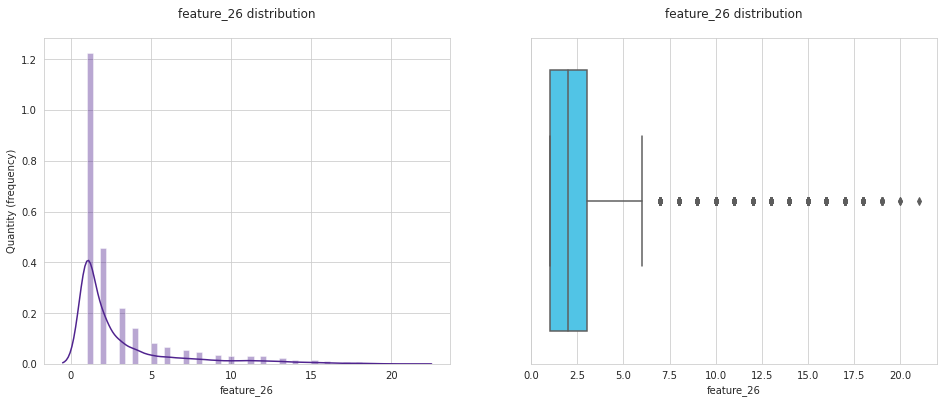

Unique values count: 31 
Q1: 1.0
Q3: 4.0
IQR: 3.0 
Outliers borders: [-3.5, 8.5]


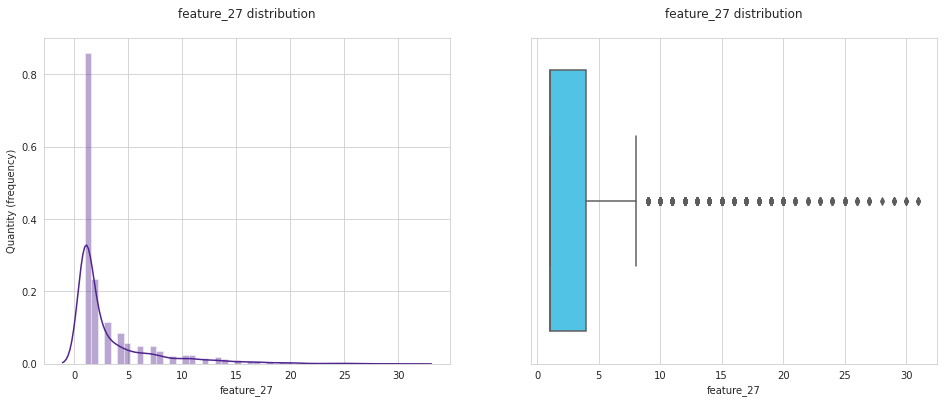

Unique values count: 23 
Q1: 1.0
Q3: 3.0
IQR: 2.0 
Outliers borders: [-2.0, 6.0]


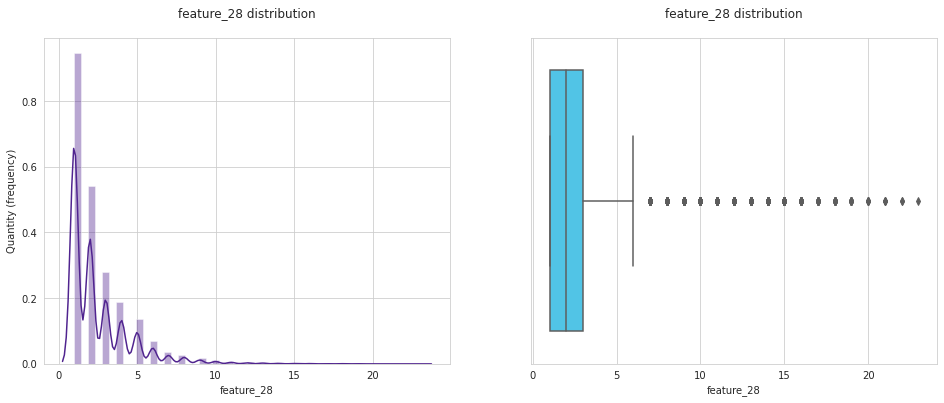

Unique values count: 13 
Q1: 1.0
Q3: 2.0
IQR: 1.0 
Outliers borders: [-0.5, 3.5]


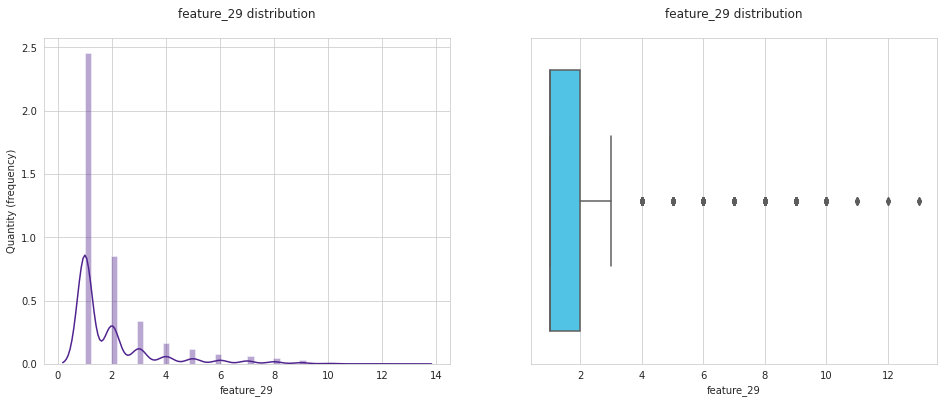

Unique values count: 42 
Q1: 1.0
Q3: 2.0
IQR: 1.0 
Outliers borders: [-0.5, 3.5]


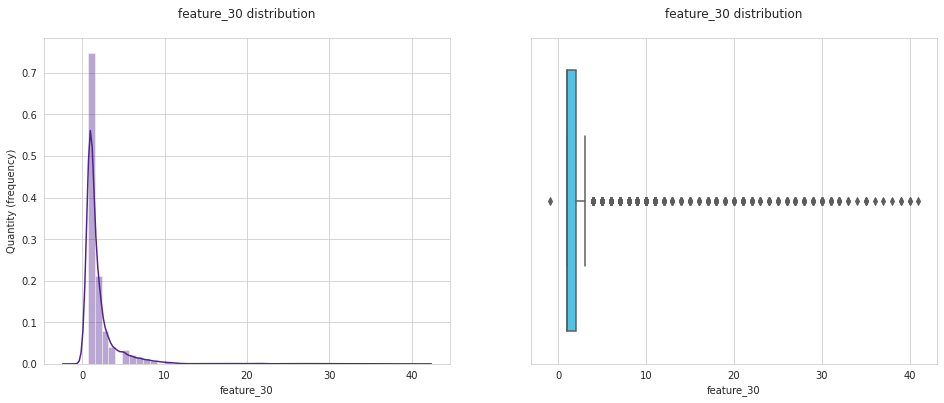

Unique values count: 45 
Q1: 1.0
Q3: 5.0
IQR: 4.0 
Outliers borders: [-5.0, 11.0]


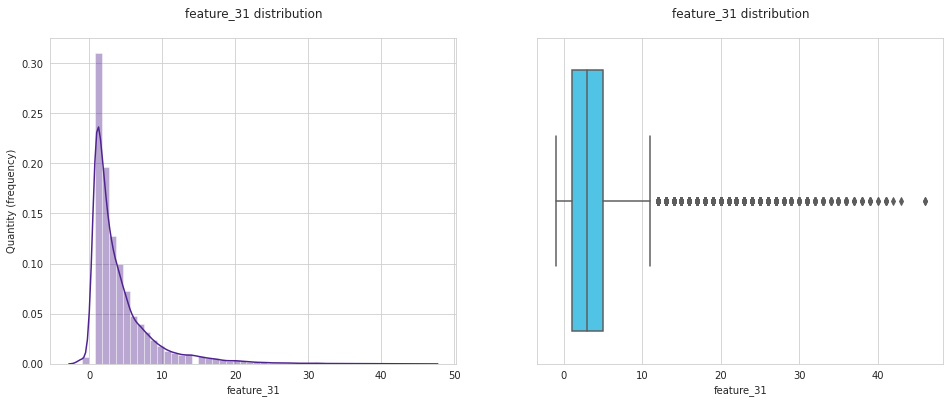

Unique values count: 29 
Q1: 1.0
Q3: 3.0
IQR: 2.0 
Outliers borders: [-2.0, 6.0]


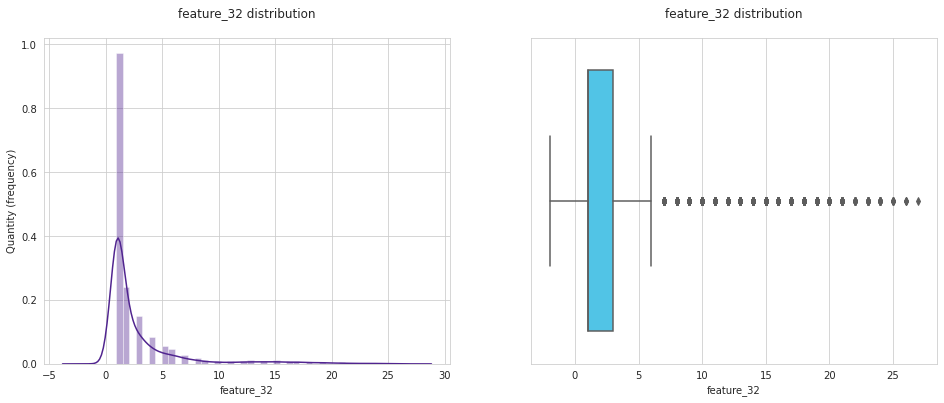

Unique values count: 24 
Q1: 1.0
Q3: 6.0
IQR: 5.0 
Outliers borders: [-6.5, 13.5]


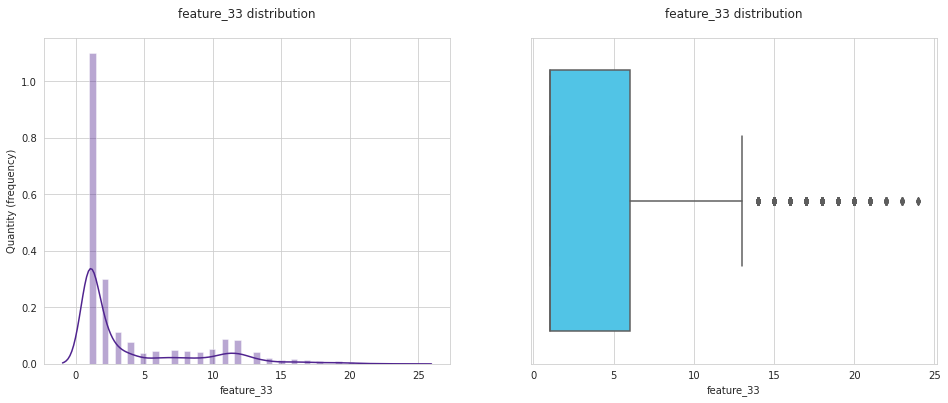

Unique values count: 25 
Q1: 1.0
Q3: 4.0
IQR: 3.0 
Outliers borders: [-3.5, 8.5]


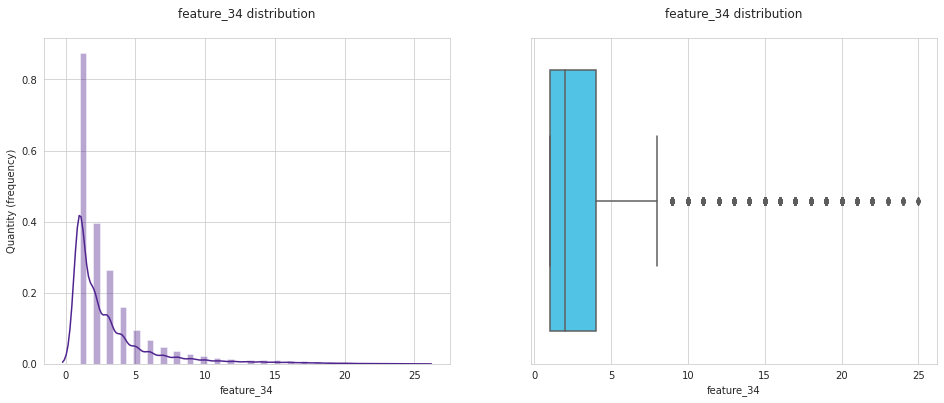

Unique values count: 43 
Q1: 1.0
Q3: 4.0
IQR: 3.0 
Outliers borders: [-3.5, 8.5]


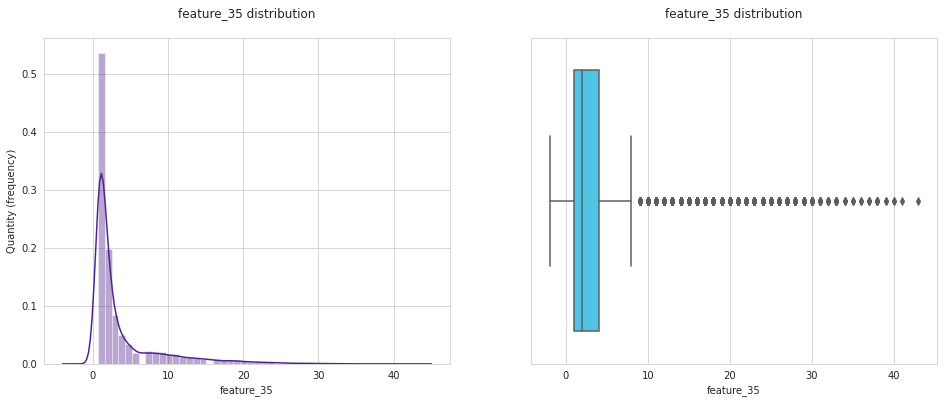

Unique values count: 3 
Q1: 1.0
Q3: 2.0
IQR: 1.0 
Outliers borders: [-0.5, 3.5]


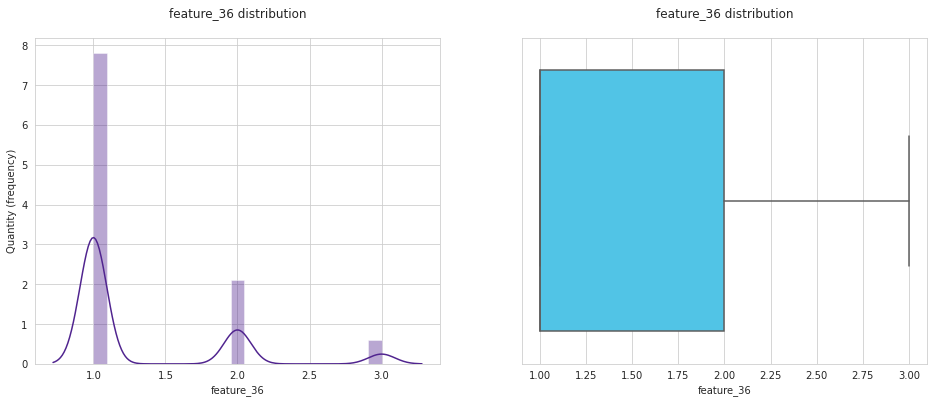

Unique values count: 14 
Q1: 1.0
Q3: 2.0
IQR: 1.0 
Outliers borders: [-0.5, 3.5]


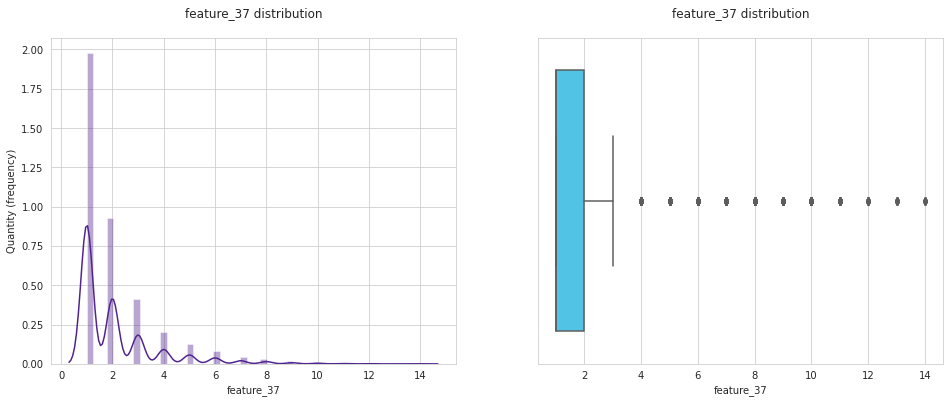

Unique values count: 70 
Q1: 2.0
Q3: 6.0
IQR: 4.0 
Outliers borders: [-4.0, 12.0]


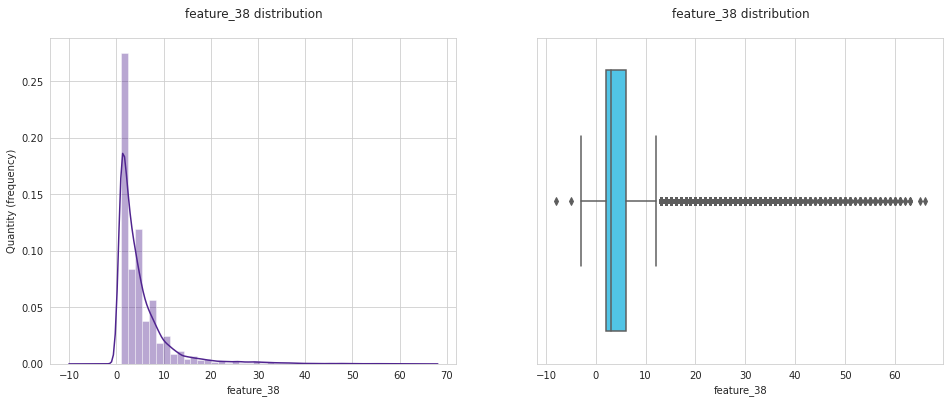

Unique values count: 69 
Q1: 1.0
Q3: 4.0
IQR: 3.0 
Outliers borders: [-3.5, 8.5]


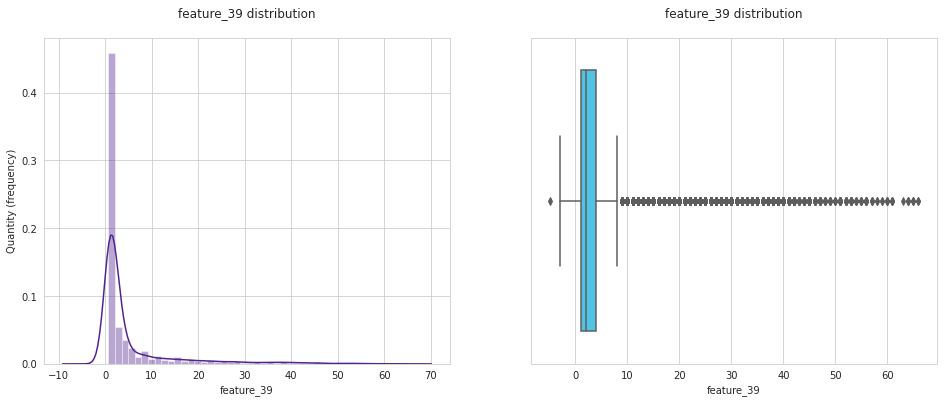

Unique values count: 21 
Q1: 1.0
Q3: 3.0
IQR: 2.0 
Outliers borders: [-2.0, 6.0]


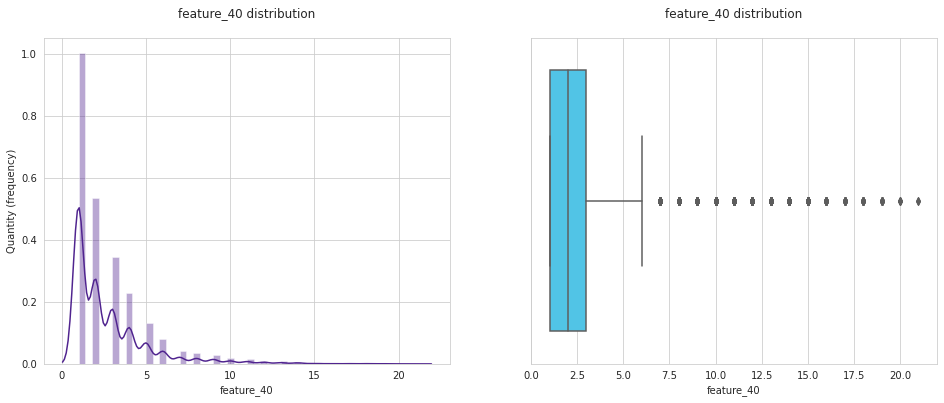

Unique values count: 30 
Q1: 1.0
Q3: 3.0
IQR: 2.0 
Outliers borders: [-2.0, 6.0]


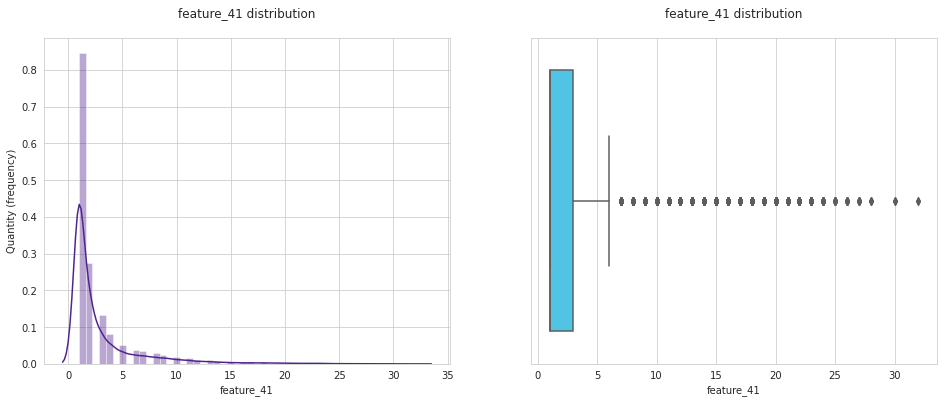

Unique values count: 39 
Q1: 1.0
Q3: 3.0
IQR: 2.0 
Outliers borders: [-2.0, 6.0]


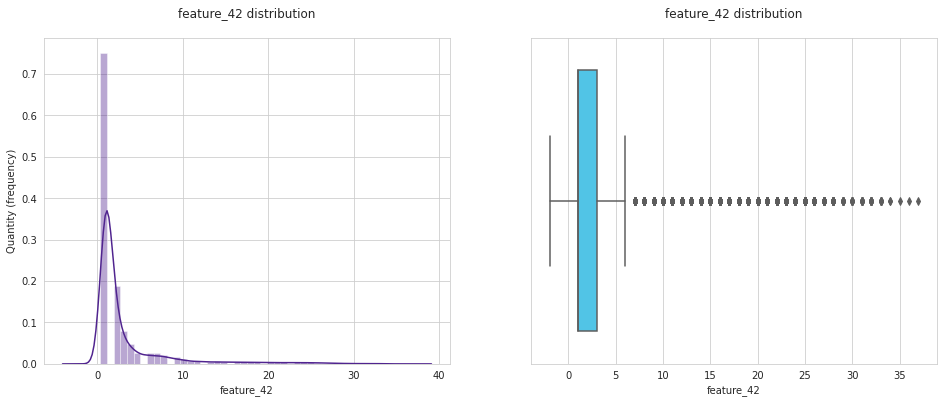

Unique values count: 32 
Q1: 1.0
Q3: 5.0
IQR: 4.0 
Outliers borders: [-5.0, 11.0]


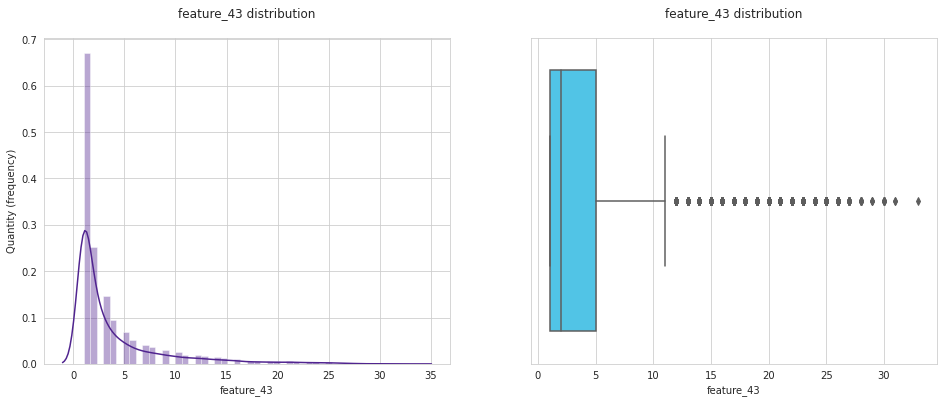

Unique values count: 9 
Q1: 1.0
Q3: 3.0
IQR: 2.0 
Outliers borders: [-2.0, 6.0]


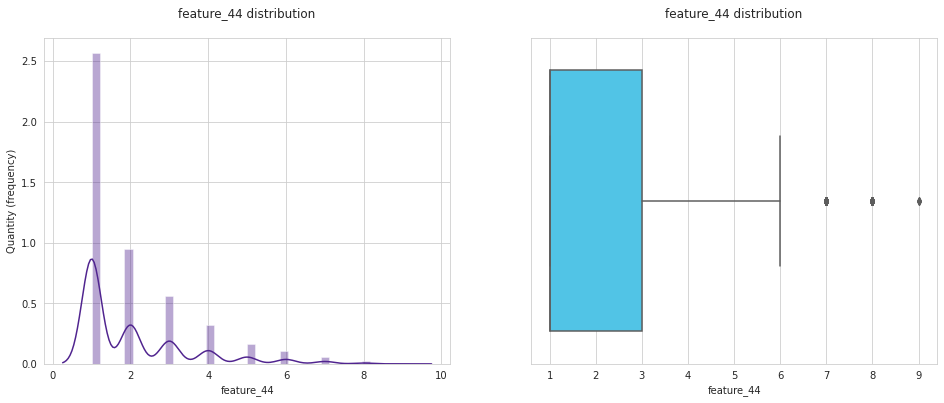

Unique values count: 26 
Q1: 1.0
Q3: 3.0
IQR: 2.0 
Outliers borders: [-2.0, 6.0]


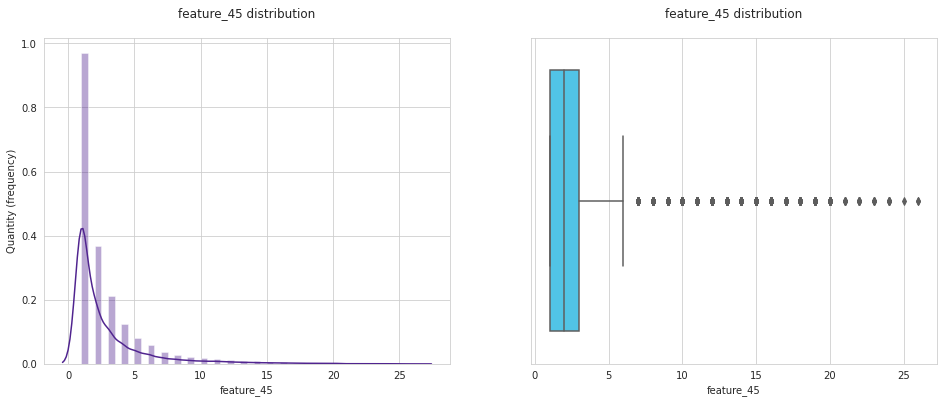

Unique values count: 29 
Q1: 1.0
Q3: 4.0
IQR: 3.0 
Outliers borders: [-3.5, 8.5]


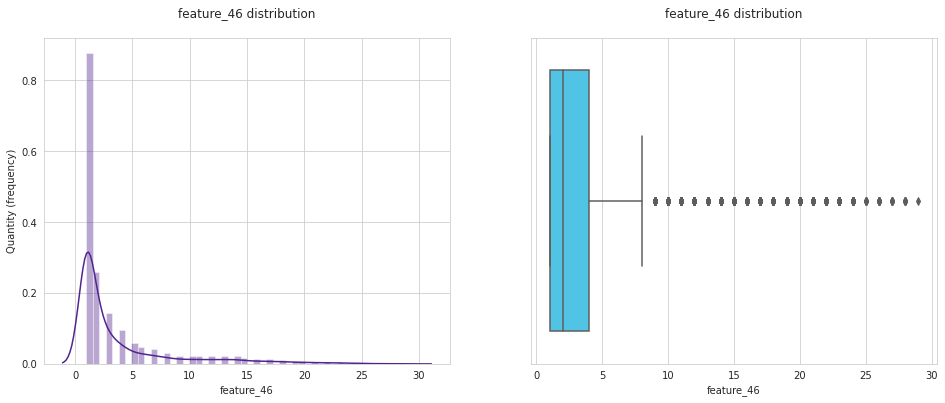

Unique values count: 25 
Q1: 1.0
Q3: 3.0
IQR: 2.0 
Outliers borders: [-2.0, 6.0]


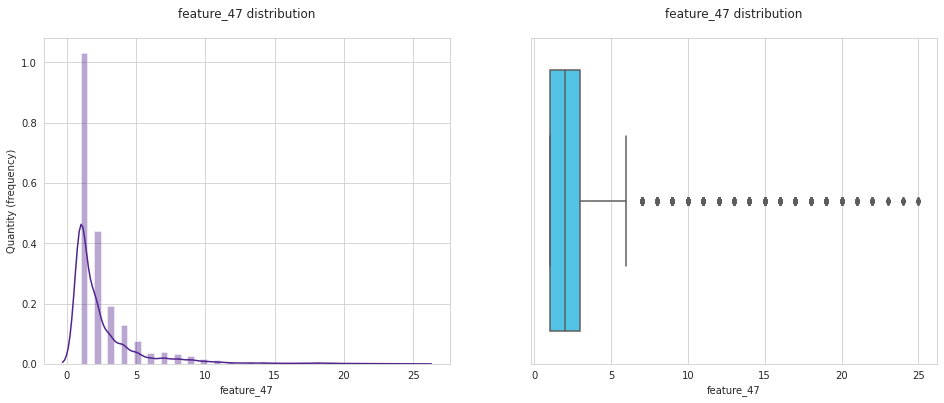

Unique values count: 44 
Q1: 1.0
Q3: 3.0
IQR: 2.0 
Outliers borders: [-2.0, 6.0]


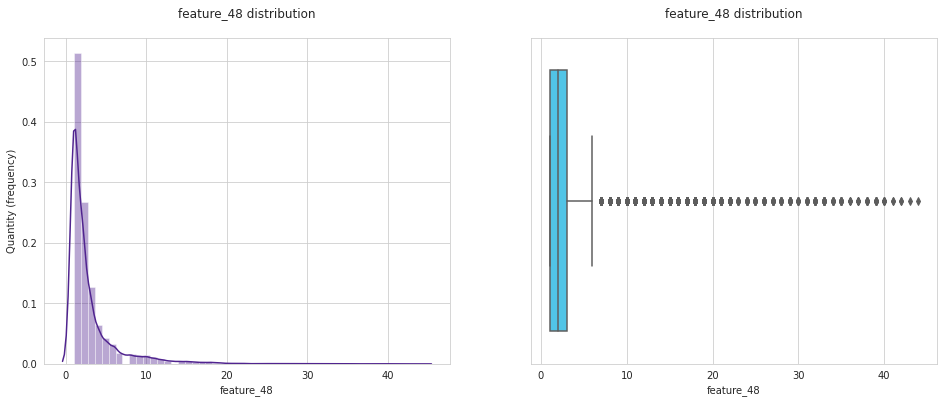

Unique values count: 20 
Q1: 1.0
Q3: 4.0
IQR: 3.0 
Outliers borders: [-3.5, 8.5]


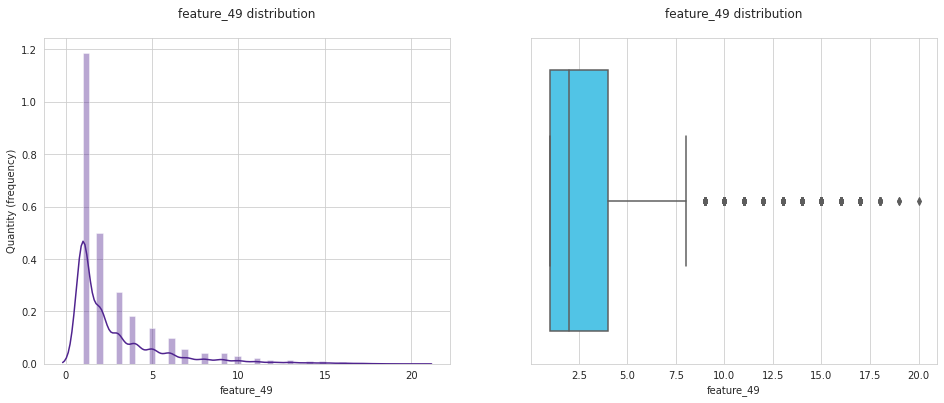

In [6]:
# zeros are outliers, let's exclude it for more clear picture
 
for c in train.columns:
    if c.startswith("feature"):
        show_IQR(train.query(f"{c} != 0")[c], None)

## Correlation
 
 
There is no important correlation in this dataset

<AxesSubplot:>

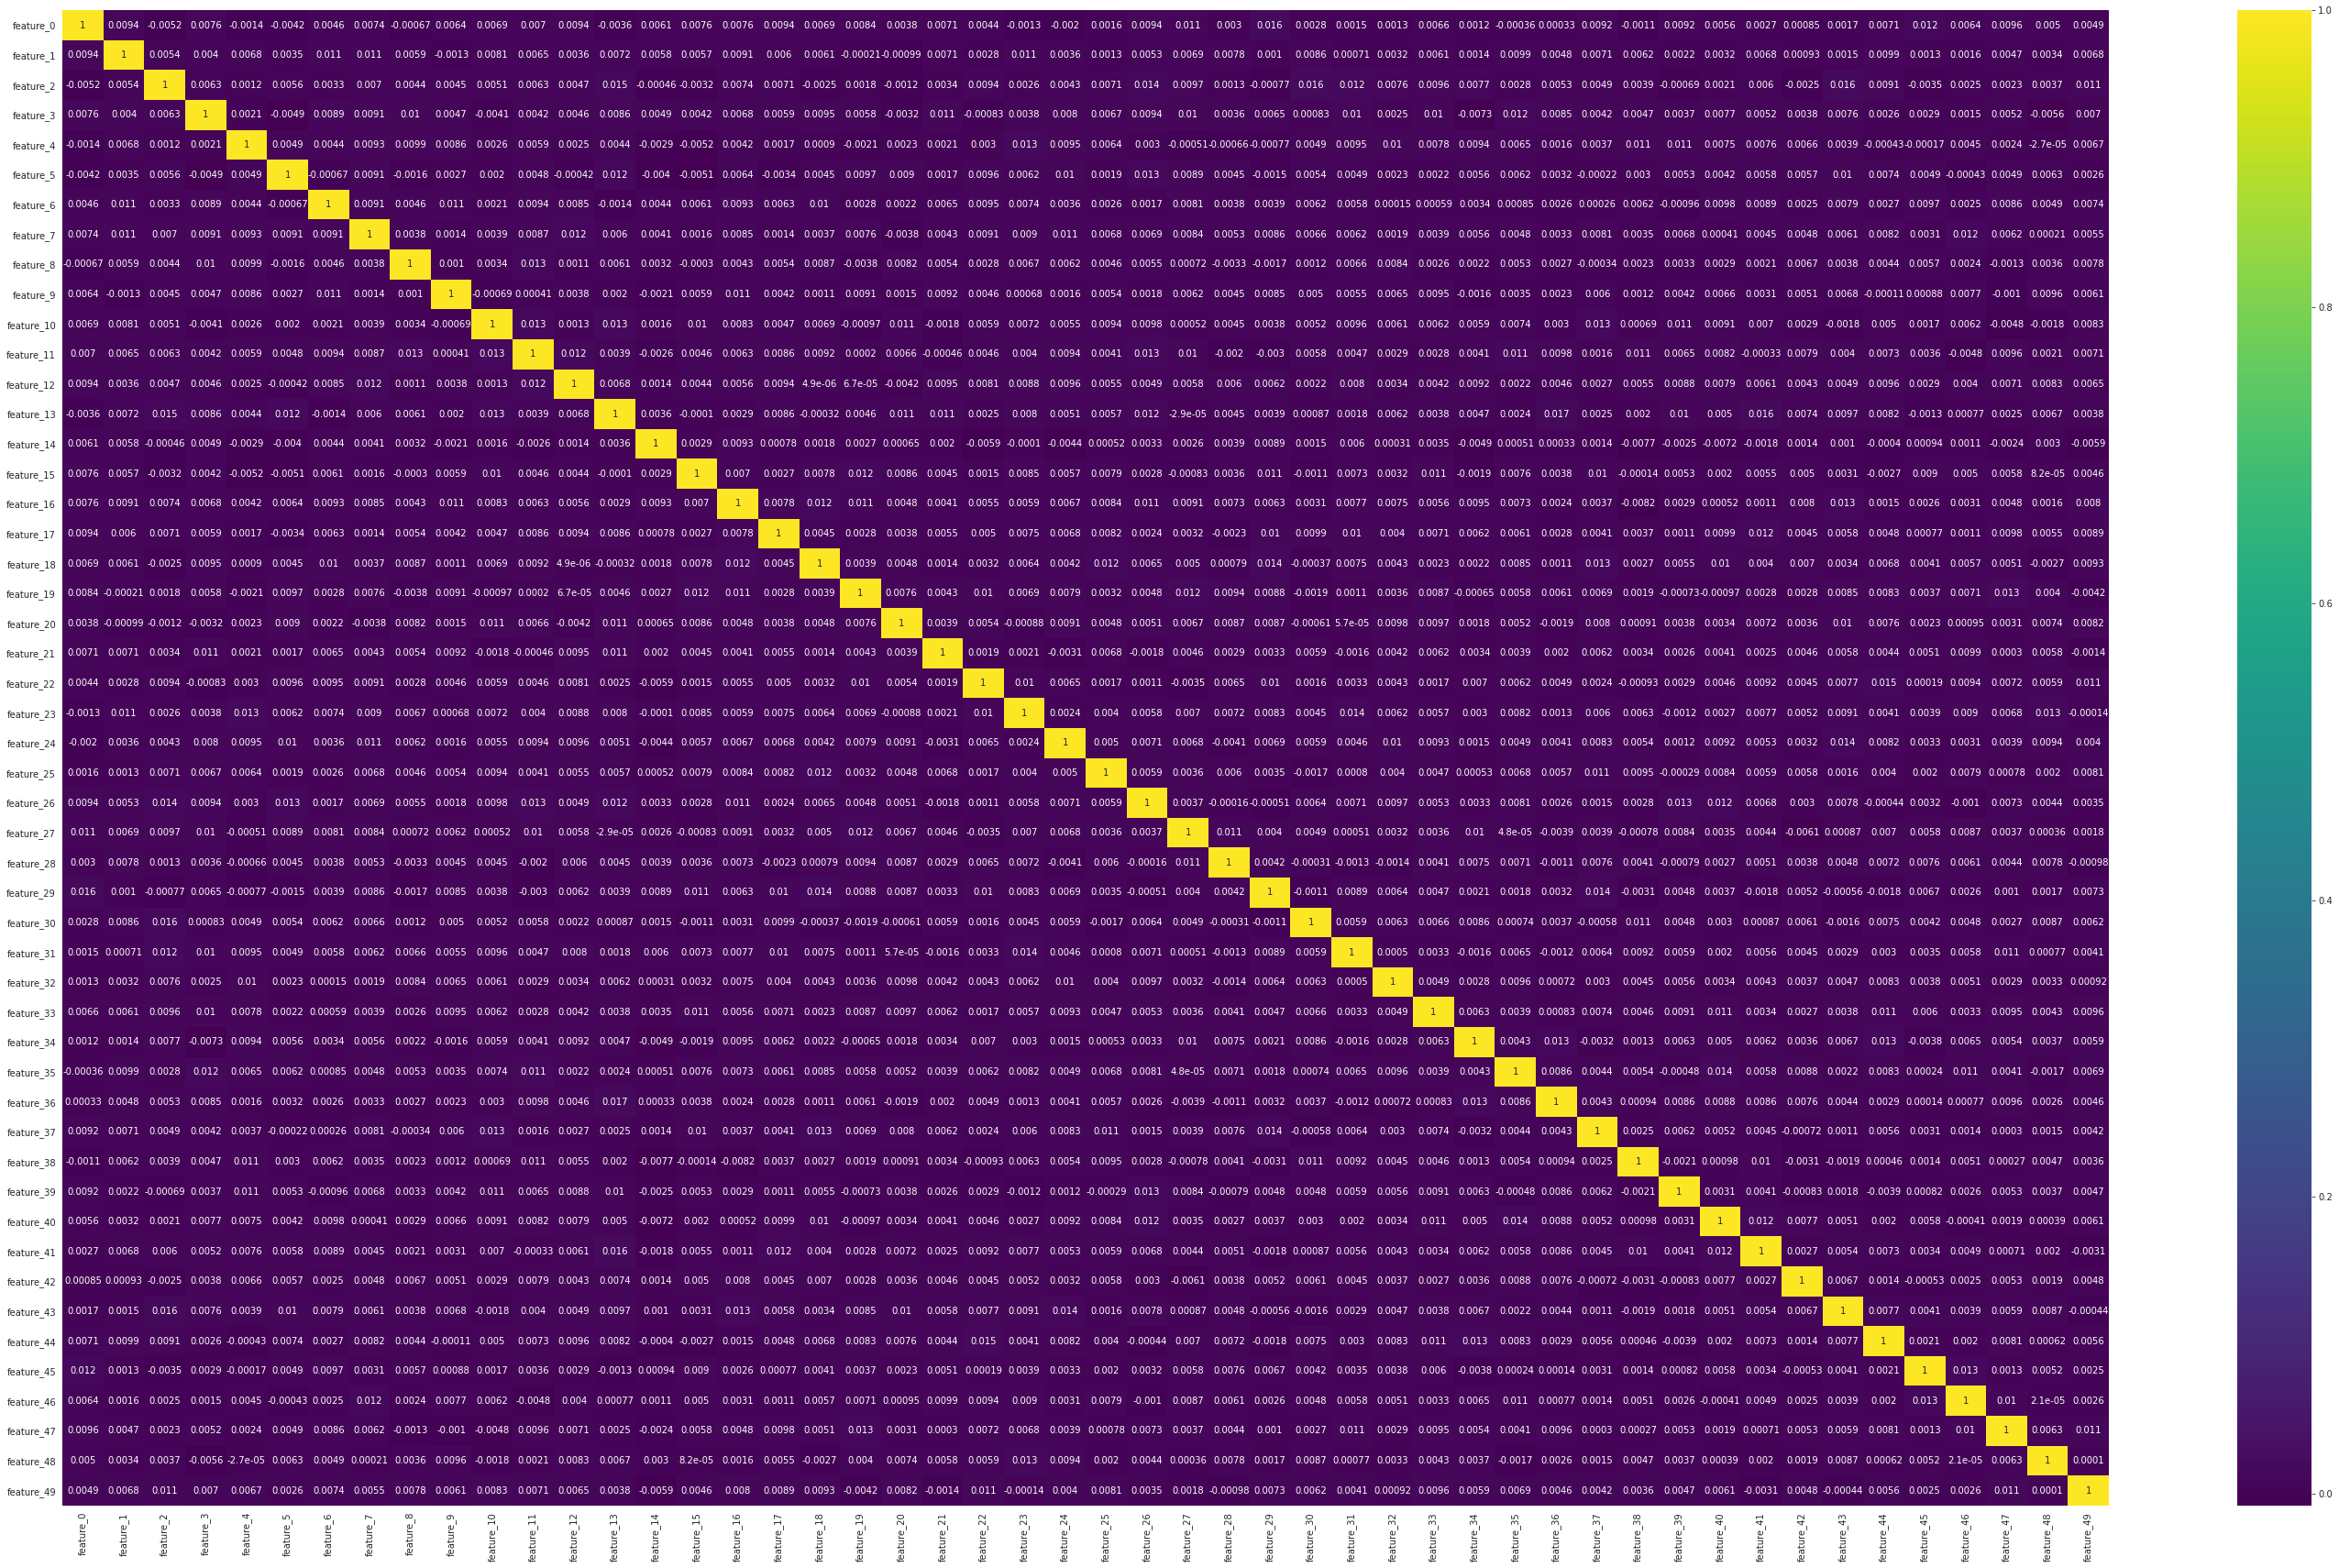

In [7]:
plt.figure(figsize=(50,30))
sns.heatmap(train[[c for c in train.columns if c.startswith("feature")]].replace({0, np.nan}).corr(), annot=True, cmap="viridis")

## Target distribution
 
Dataset is imbalanced: only 8490 rows belongs to class 1 while 57497 (more than half) belongs to class 2
 
Target classes distributed quite similarly for most of variables, except some features:

- class 3 is wider than others: features 21, 26, 40, 42, 43, 45
- class 3 is too thin: 36, 34
- classes 2 and 3 are wider than 1 and 4: 33, 49
- feature 12 is maybe ordinal (represent months?)
- class 1 is wider than others: 6, 27, 37, 38
- features 2, 13, 22, 36 have to low number of unique values

In [8]:
train.target.value_counts().to_frame().reset_index().sort_values(["index"]).set_index("index").style.bar(color="lightblue")

,target
index,
Class_1,8490
Class_2,57497
Class_3,21420
Class_4,12593


In [9]:
train.drop(["id"], axis=1).groupby("target").nunique().T

target,Class_1,Class_2,Class_3,Class_4
feature_0,11,11,11,11
feature_1,29,30,29,29
feature_2,7,7,7,7
feature_3,26,25,24,25
feature_4,35,37,36,34
feature_5,11,10,10,10
feature_6,27,28,24,26
feature_7,27,32,26,29
feature_8,34,36,34,33
feature_9,17,16,18,17


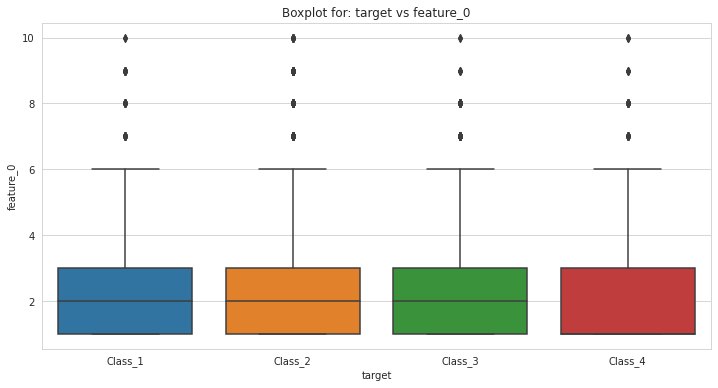

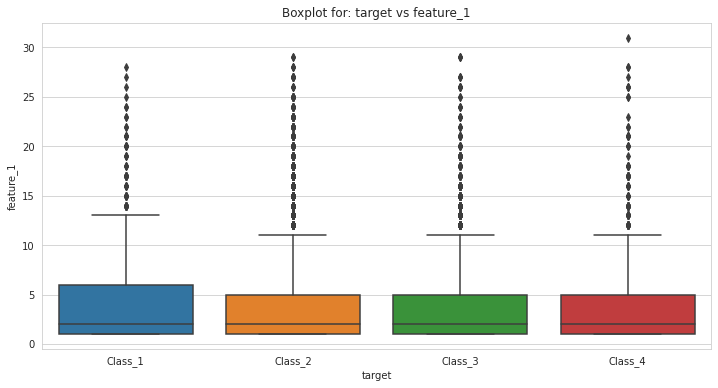

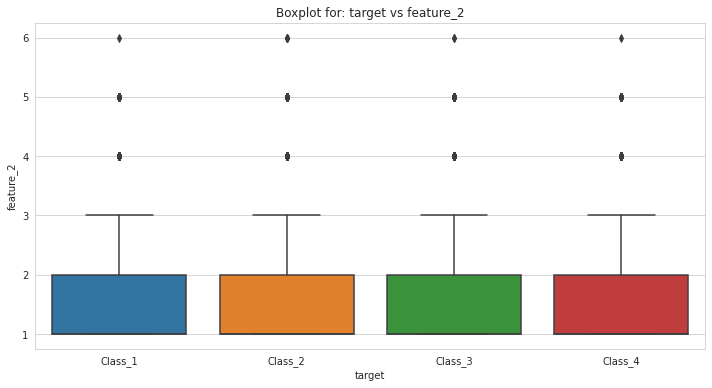

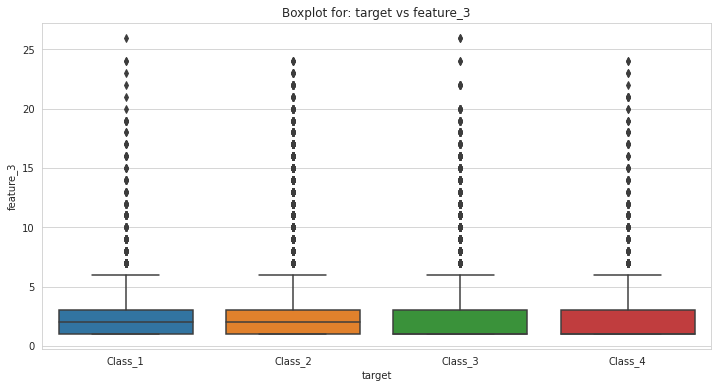

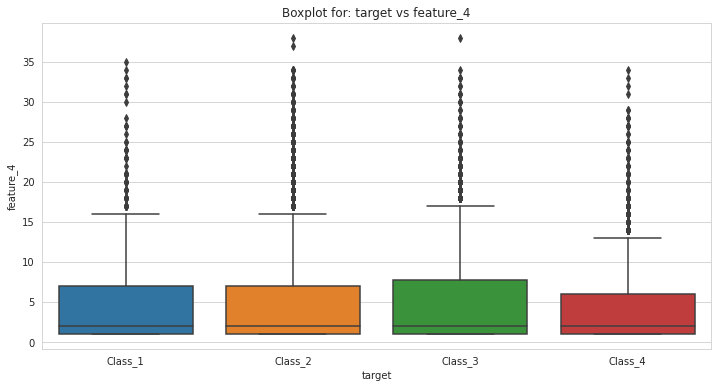

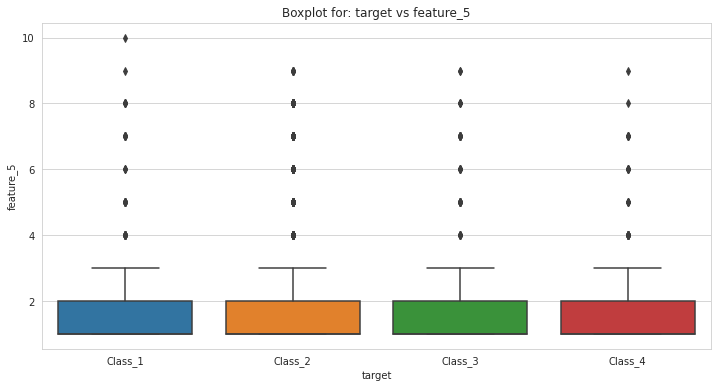

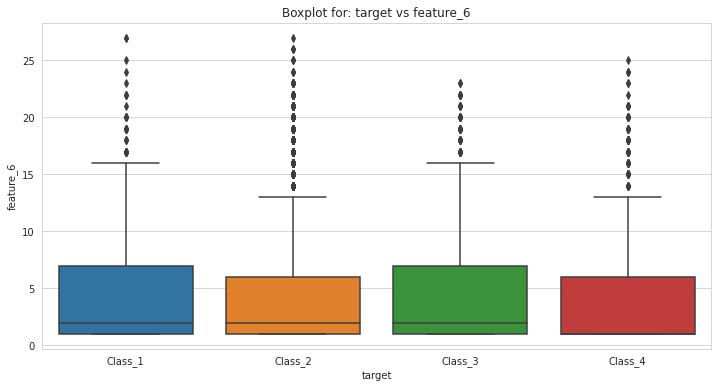

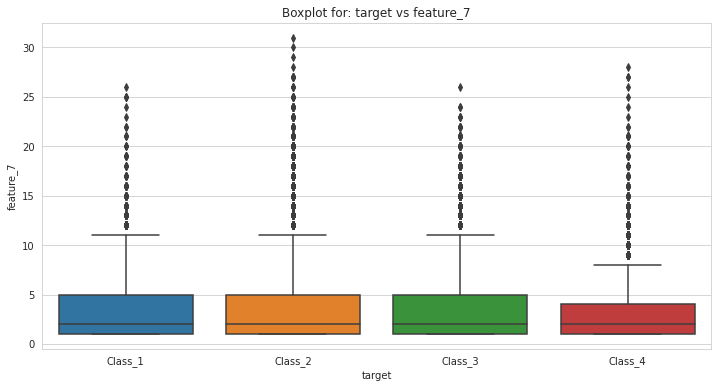

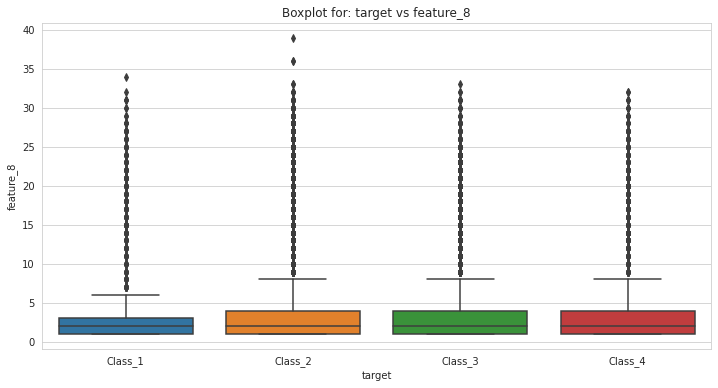

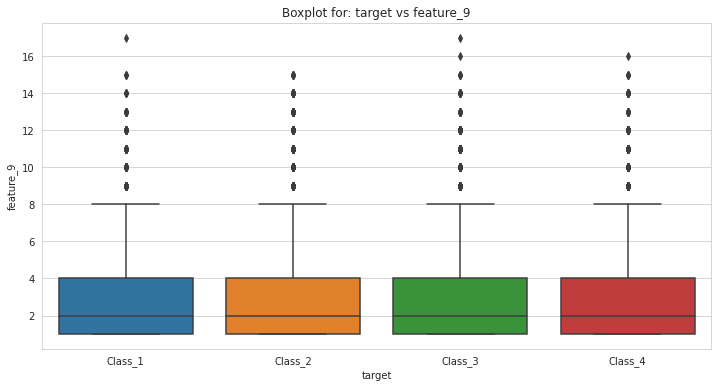

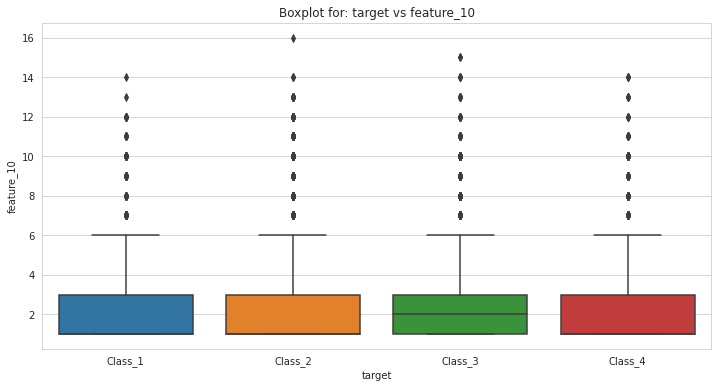

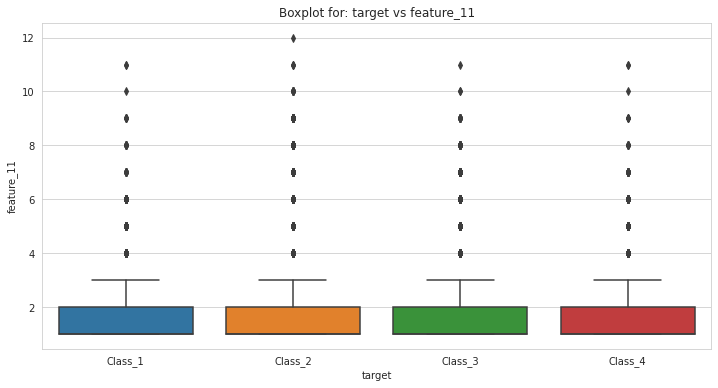

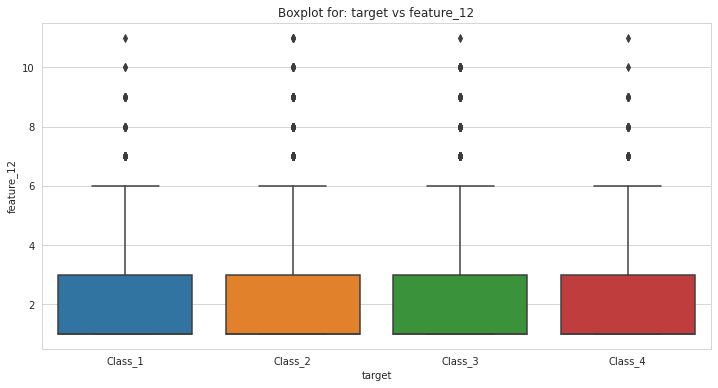

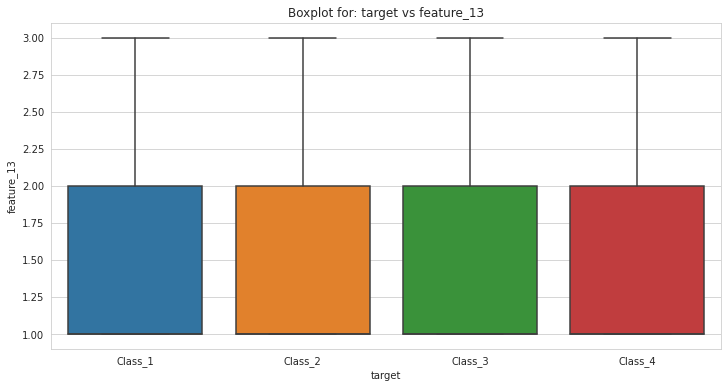

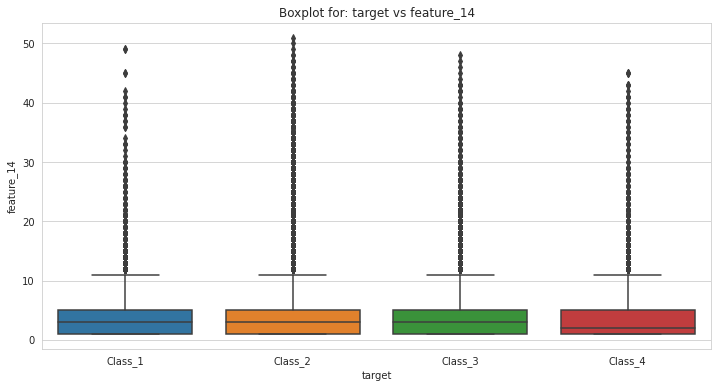

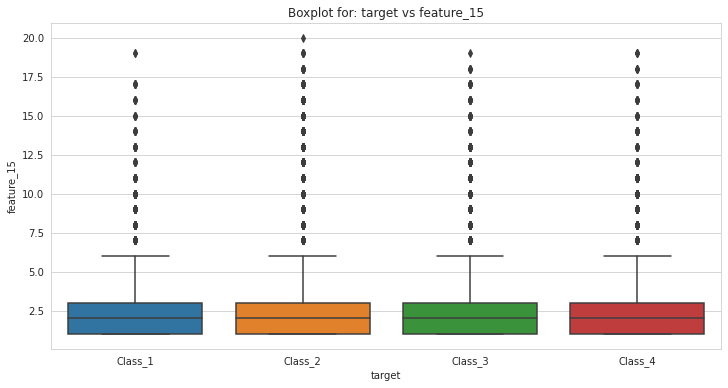

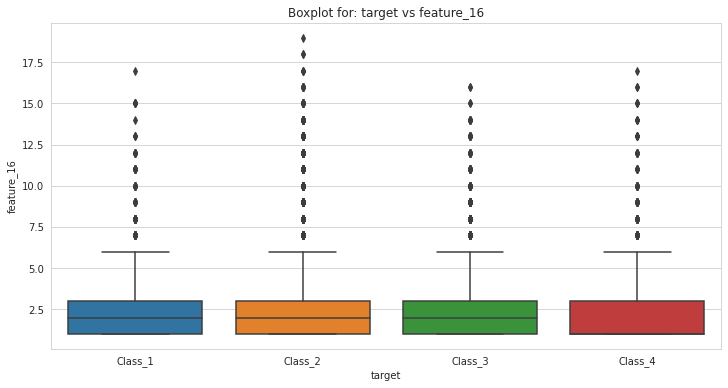

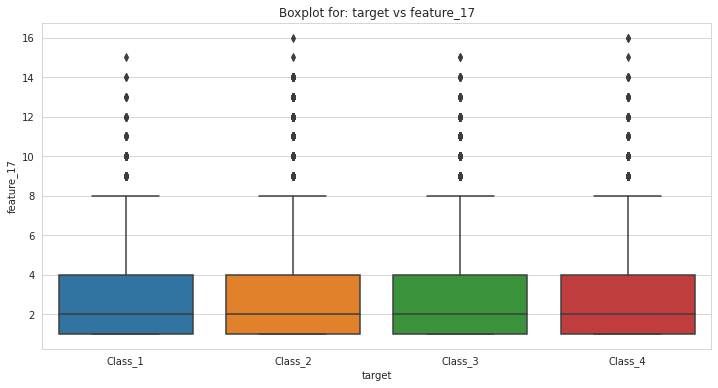

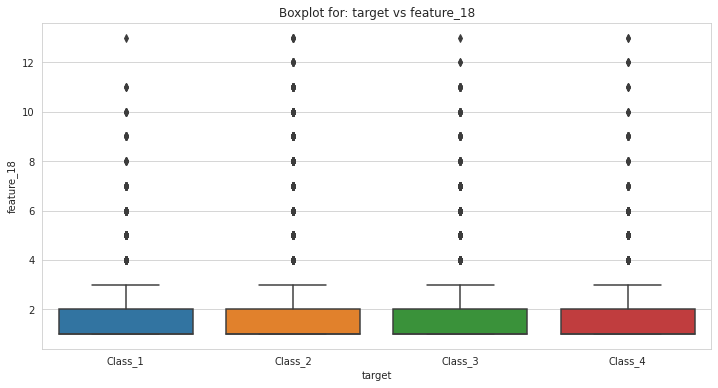

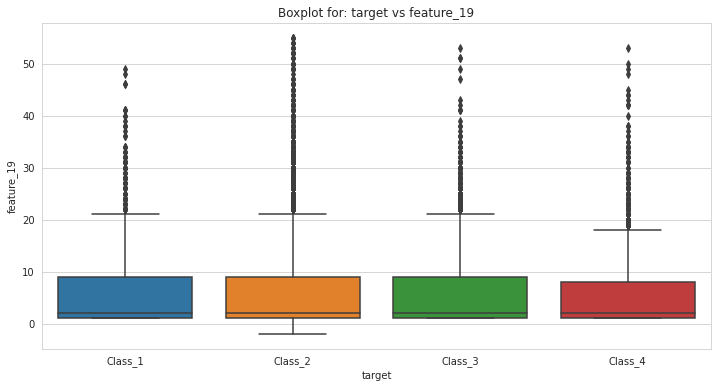

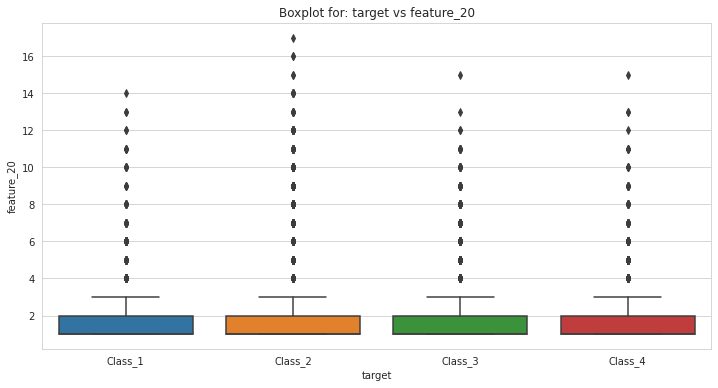

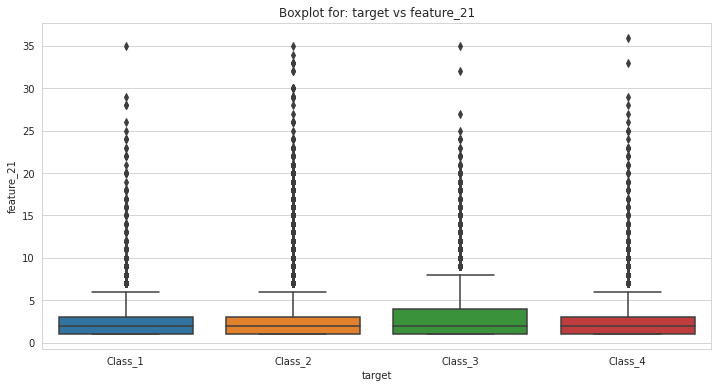

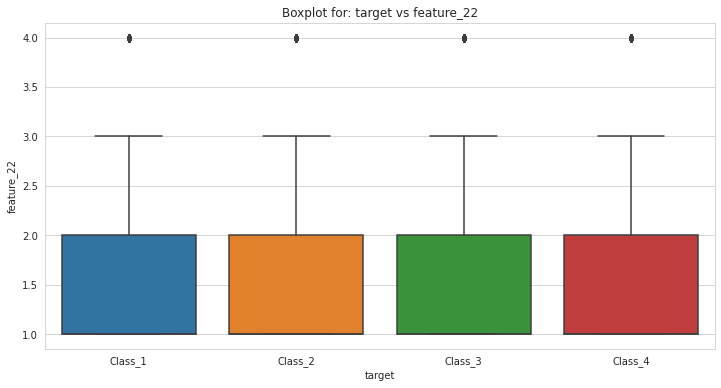

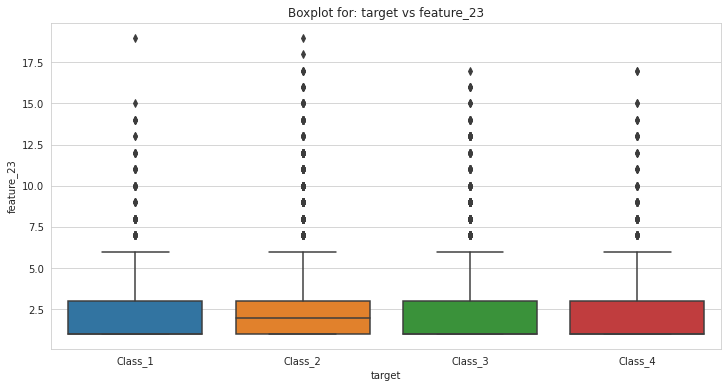

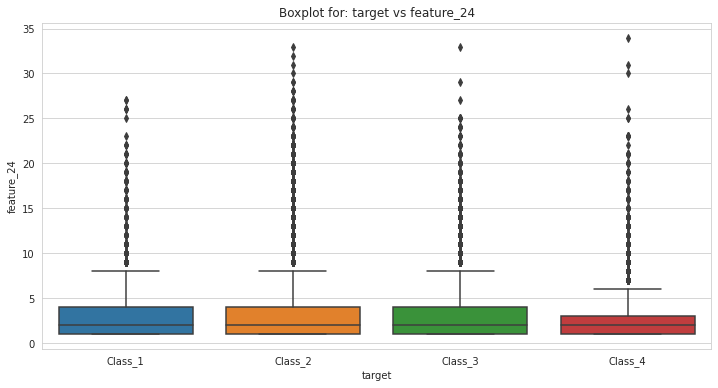

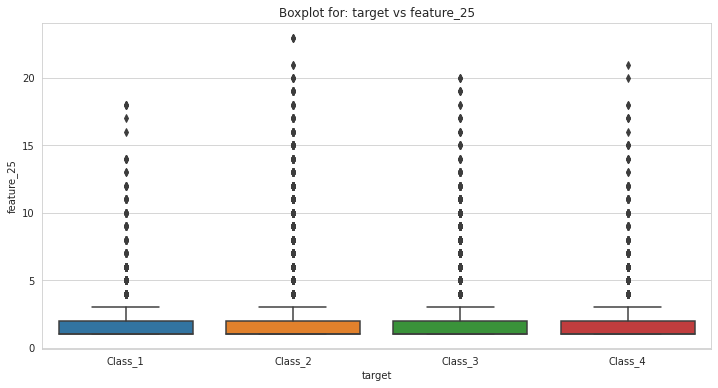

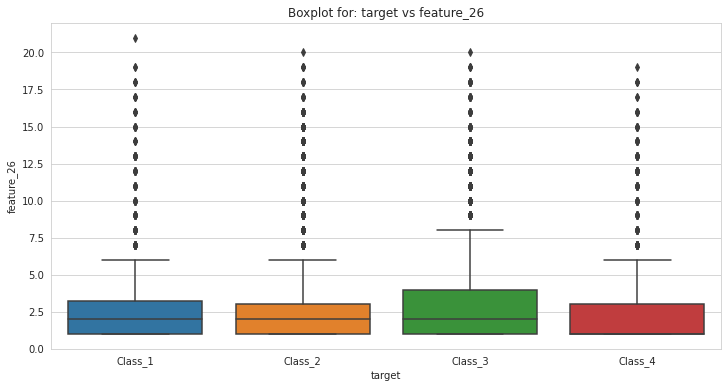

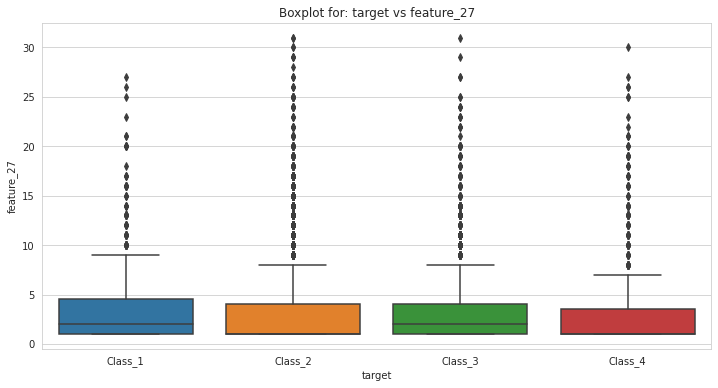

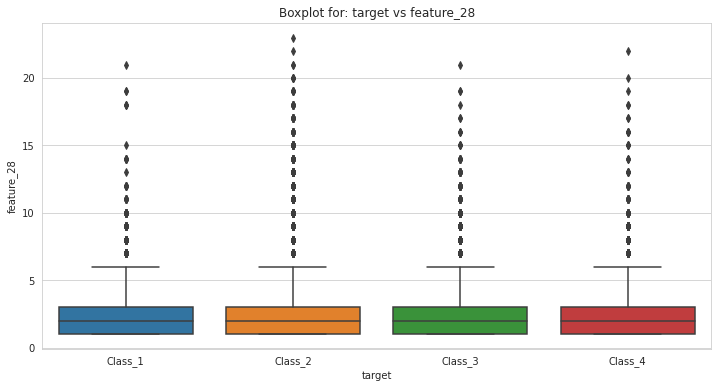

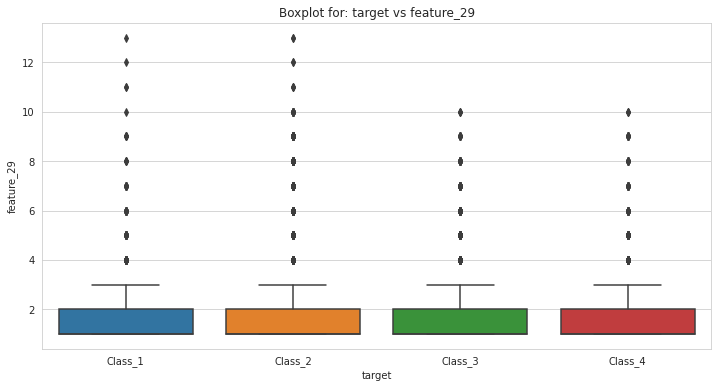

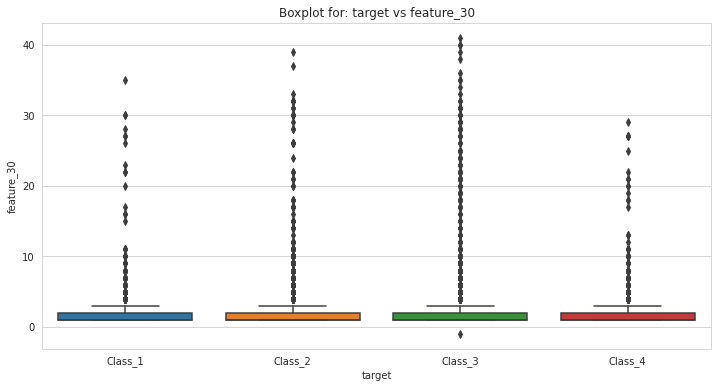

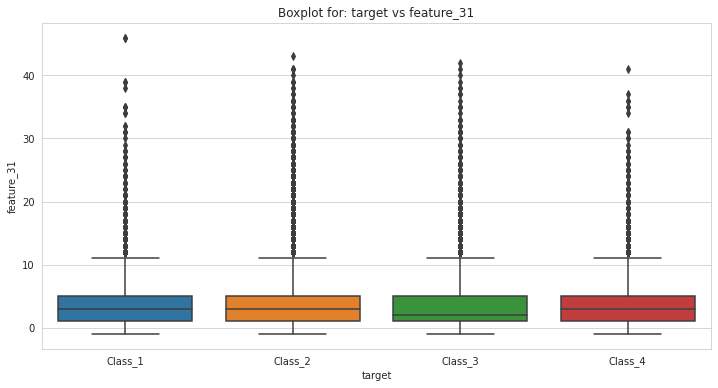

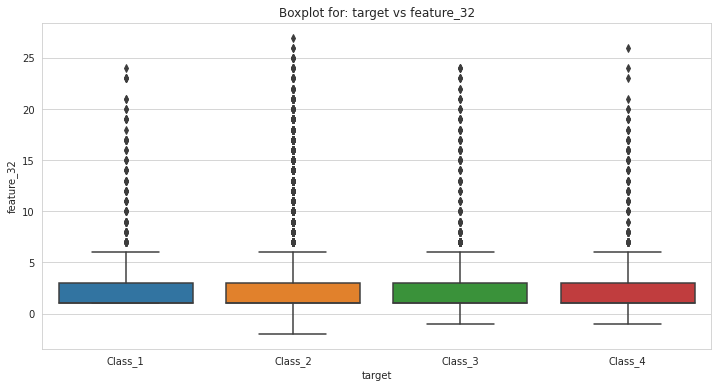

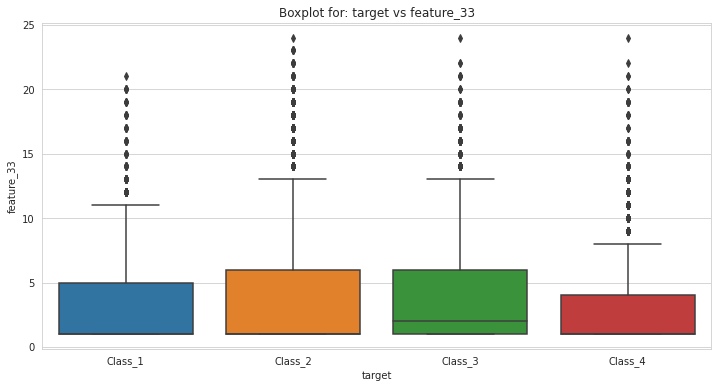

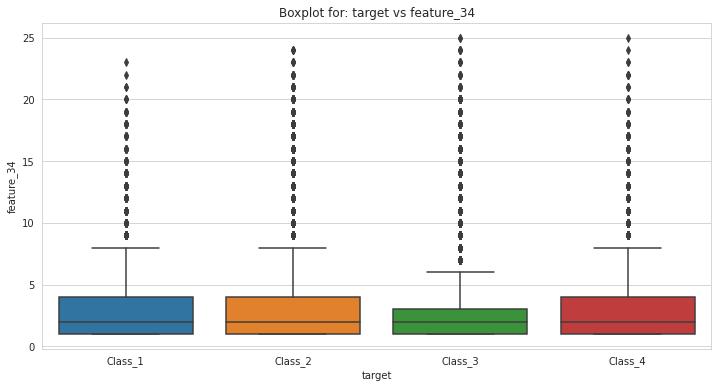

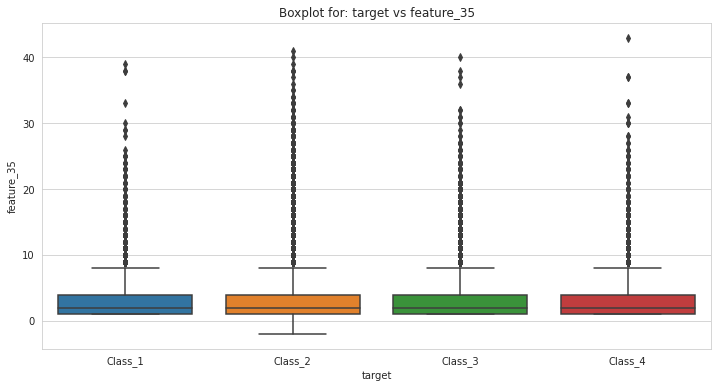

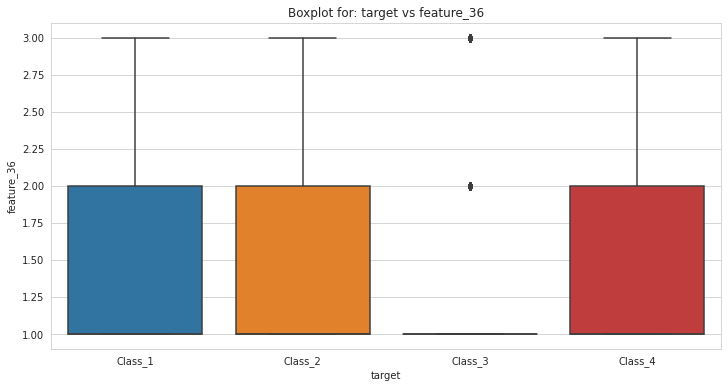

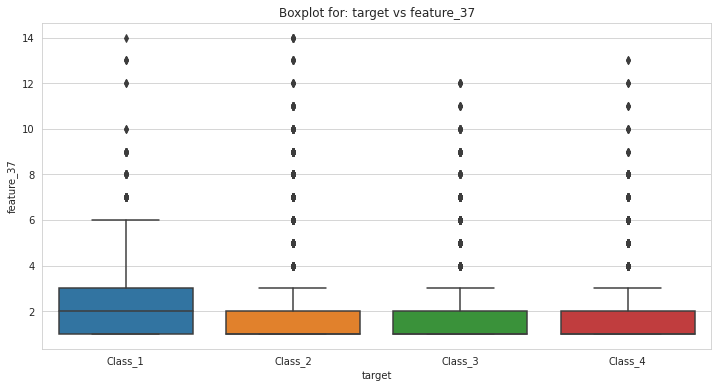

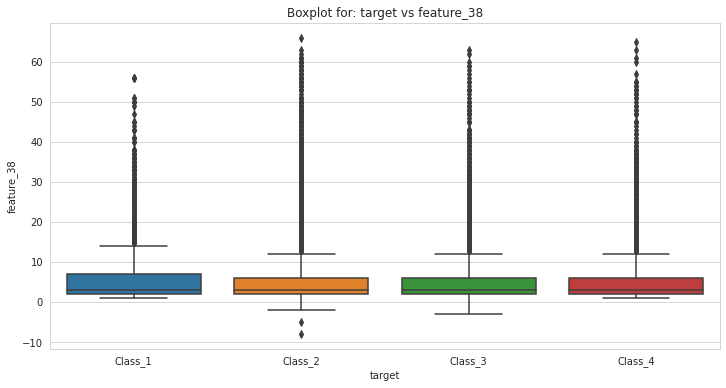

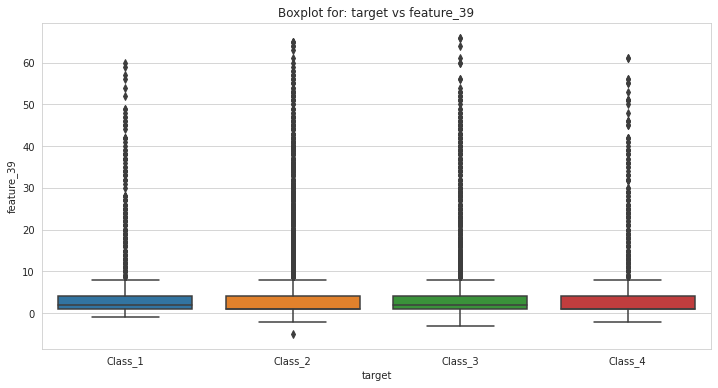

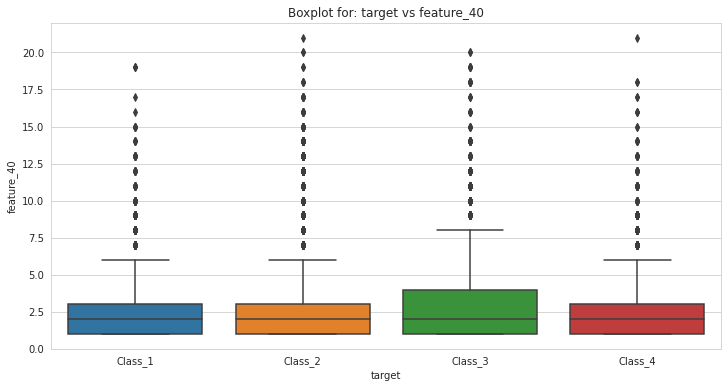

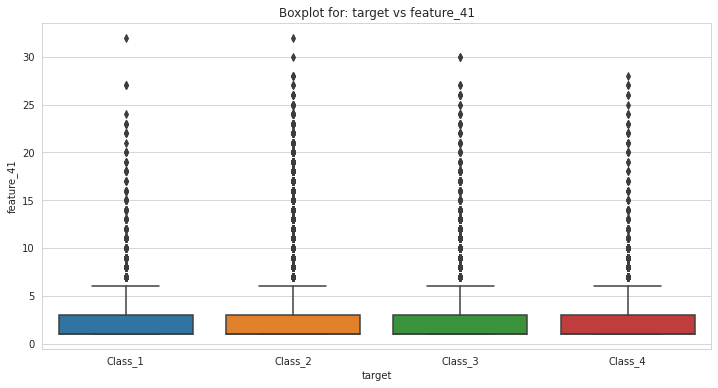

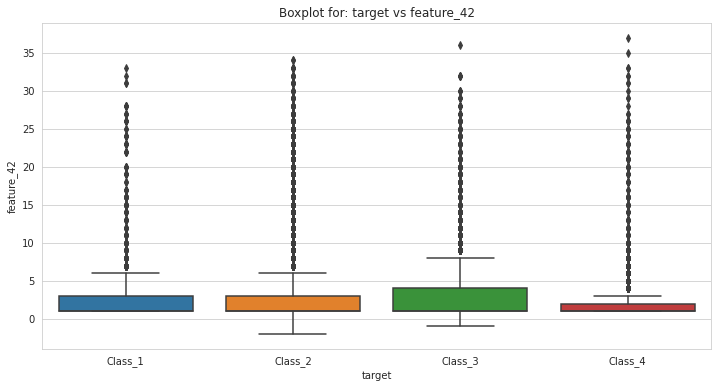

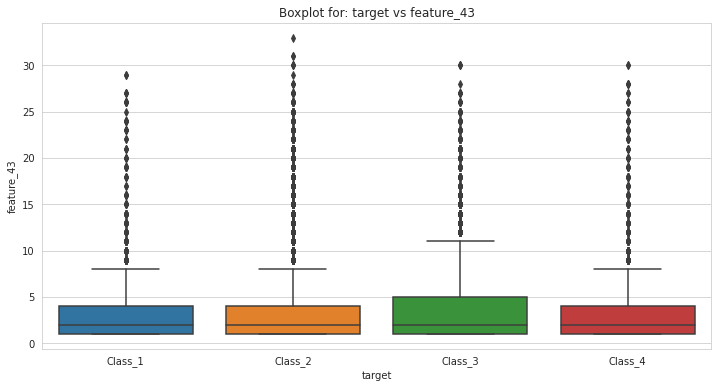

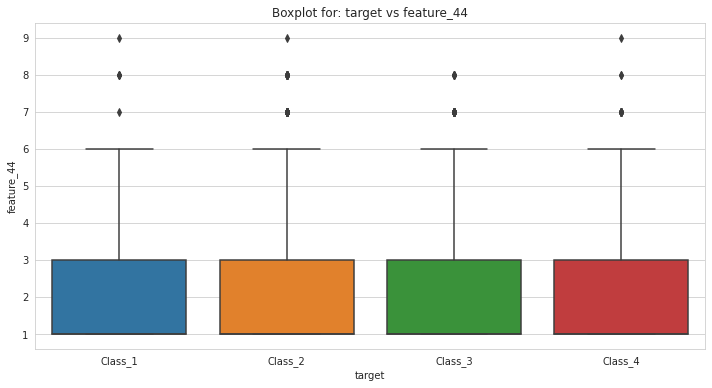

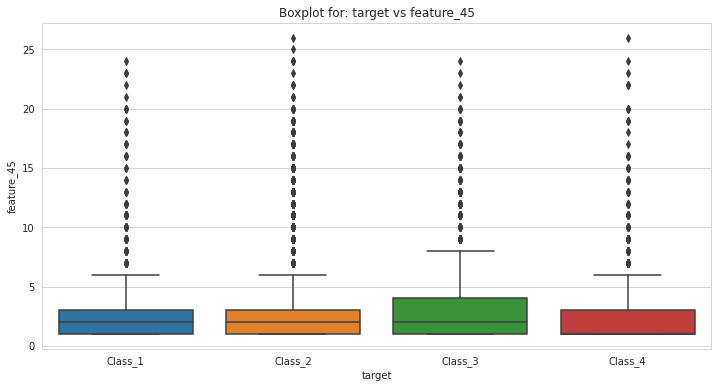

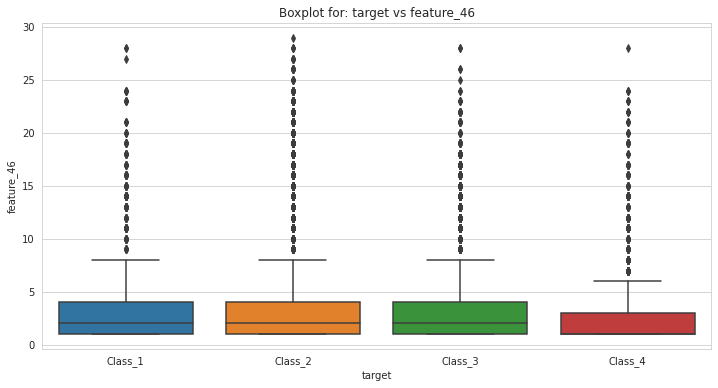

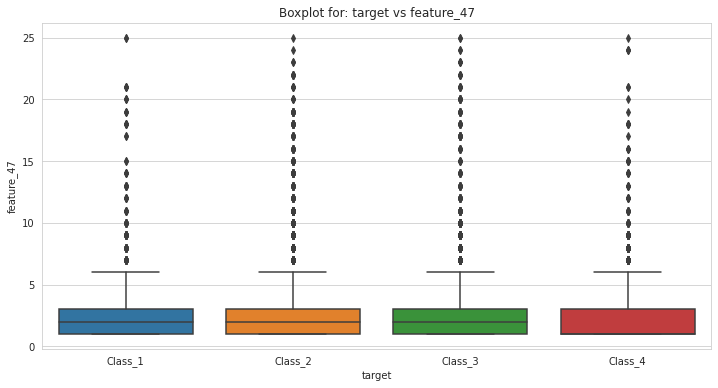

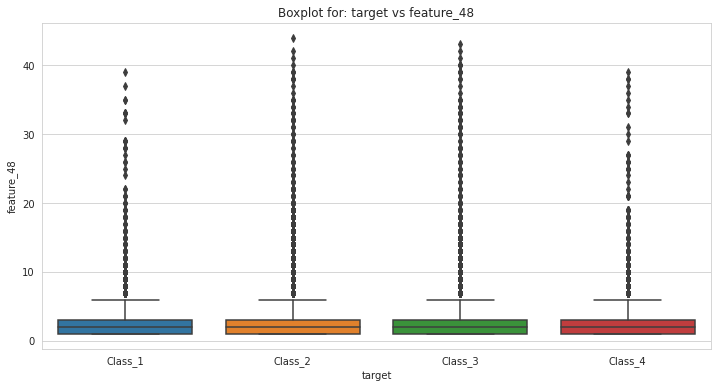

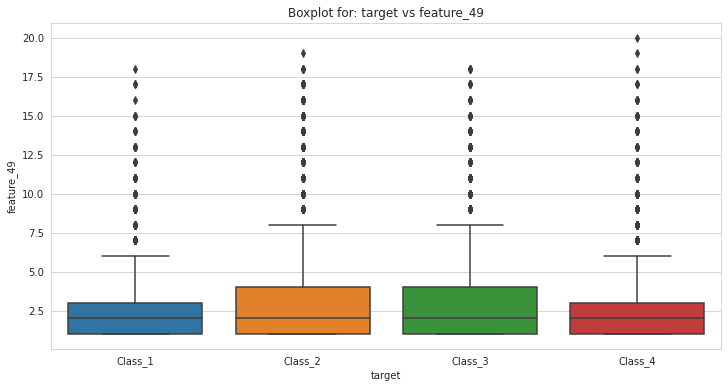

In [10]:
for col in train.columns[train.columns.str.startswith("feature")]:
    show_by_cat(train.query(f"{col} != 0").sort_values(["target"]), "target", col)

## By-feature deep dive
 
Work in progress